# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

# Explore and clean the dataset

In [3]:
df = pd.read_csv('movies_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142838 entries, 0 to 1142837
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1142838 non-null  int64  
 1   title                 1142825 non-null  object 
 2   vote_average          1142838 non-null  float64
 3   vote_count            1142838 non-null  int64  
 4   status                1142838 non-null  object 
 5   release_date          953348 non-null   object 
 6   revenue               1142838 non-null  int64  
 7   runtime               1142838 non-null  int64  
 8   adult                 1142838 non-null  bool   
 9   backdrop_path         302823 non-null   object 
 10  budget                1142838 non-null  int64  
 11  homepage              120913 non-null   object 
 12  imdb_id               604267 non-null   object 
 13  original_language     1142838 non-null  object 
 14  original_title        1142825 non-

In [5]:
df.describe()

id  vote_average    vote_count       revenue       runtime  \
count  1.142838e+06  1.142838e+06  1.142838e+06  1.142838e+06  1.142838e+06   
mean   7.441705e+05  1.870974e+00  1.876829e+01  6.883906e+05  4.765067e+01   
std    3.976687e+05  3.017334e+00  3.176484e+02  1.790443e+07  6.164521e+01   
min    2.000000e+00  0.000000e+00  0.000000e+00 -1.200000e+01 -2.800000e+01   
25%    4.127472e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    7.492635e+05  0.000000e+00  0.000000e+00  0.000000e+00  2.200000e+01   
75%    1.097524e+06  4.700000e+00  1.000000e+00  0.000000e+00  8.900000e+01   
max    1.398339e+06  1.000000e+01  3.449500e+04  3.000000e+09  1.440000e+04   

             budget    popularity  
count  1.142838e+06  1.142838e+06  
mean   2.671502e+05  1.231032e+00  
std    5.061486e+06  7.566803e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  6.000000e-01  
50%    0.000000e+00  6.000000e-01  
75%    0.000000e+00  8.760000e-01  
max    1.000000e+09  2.994357e+03

In [6]:
df.duplicated().sum()

368

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             189275
revenue                       0
runtime                       0
adult                         0
backdrop_path            839678
budget                        0
homepage                1021593
imdb_id                  538310
original_language             0
original_title               13
overview                 232837
popularity                    0
poster_path              361663
tagline                  982310
genres                   458703
production_companies     627542
production_countries     507268
spoken_languages         487821
keywords                 833650
dtype: int64

In [10]:
#removing movies with no title(title is null)
df=df.dropna(subset=['title','original_title'])

In [11]:
df.isnull().sum()

id                            0
title                         0
vote_average                  0
vote_count                    0
status                        0
release_date             189266
revenue                       0
runtime                       0
adult                         0
backdrop_path            839668
budget                        0
homepage                1021580
imdb_id                  538297
original_language             0
original_title                0
overview                 232828
popularity                    0
poster_path              361657
tagline                  982297
genres                   458695
production_companies     627529
production_countries     507258
spoken_languages         487812
keywords                 833638
dtype: int64

In [12]:
df.head(2)

id         title  vote_average  vote_count    status release_date  \
0   27205     Inception         8.364       34495  Released   2010-07-15   
1  157336  Interstellar         8.417       32571  Released   2014-11-05   

     revenue  runtime  adult                     backdrop_path  ...  \
0  825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1  701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   

   original_title                                           overview  \
0       Inception  Cobb, a skilled thief who commits corporate es...   
1    Interstellar  The adventures of a group of explorers who mak...   

  popularity                       poster_path  \
0     83.952  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1    140.241  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   

                               genres  \
0  Action, Science Fiction, Adventure   
1   Adventure, Drama, Science Fiction   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  

[2 rows x 24 columns]

# remove the columns which are not required for the models

In [13]:
#now we will remove the columns which are not required for the models
model_df = df.drop(['id','release_date','backdrop_path','homepage','imdb_id','overview','poster_path','tagline','production_companies','keywords','spoken_languages'],axis=1)

In [14]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142457 entries, 0 to 1142837
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1142457 non-null  object 
 1   vote_average          1142457 non-null  float64
 2   vote_count            1142457 non-null  int64  
 3   status                1142457 non-null  object 
 4   revenue               1142457 non-null  int64  
 5   runtime               1142457 non-null  int64  
 6   adult                 1142457 non-null  bool   
 7   budget                1142457 non-null  int64  
 8   original_language     1142457 non-null  object 
 9   original_title        1142457 non-null  object 
 10  popularity            1142457 non-null  float64
 11  genres                683762 non-null   object 
 12  production_countries  635199 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 114.4+ MB


In [15]:
model_df.isnull().sum()

title                        0
vote_average                 0
vote_count                   0
status                       0
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
original_title               0
popularity                   0
genres                  458695
production_countries    507258
dtype: int64

In [16]:
model_df['genres'] = model_df['genres'].fillna('unknown')

In [17]:
model_df['production_countries'] = model_df['production_countries'].fillna('unknown')  

In [18]:
model_df.isnull().sum()

title                   0
vote_average            0
vote_count              0
status                  0
revenue                 0
runtime                 0
adult                   0
budget                  0
original_language       0
original_title          0
popularity              0
genres                  0
production_countries    0
dtype: int64

In [19]:
model_df.head(2)

title  vote_average  vote_count    status    revenue  runtime  \
0     Inception         8.364       34495  Released  825532764      148   
1  Interstellar         8.417       32571  Released  701729206      169   

   adult     budget original_language original_title  popularity  \
0  False  160000000                en      Inception      83.952   
1  False  165000000                en   Interstellar     140.241   

                               genres  \
0  Action, Science Fiction, Adventure   
1   Adventure, Drama, Science Fiction   

                       production_countries  
0  United Kingdom, United States of America  
1  United Kingdom, United States of America

<h1>multi lable incoder</h1>

In [20]:

model_df['original_language'].unique() 


array(['en', 'ko', 'fr', 'ja', 'it', 'es', 'pl', 'pt', 'hi', 'tr', 'da',
       'de', 'cn', 'id', 'zh', 'sv', 'el', 'ru', 'sr', 'fa', 'th', 'ar',
       'no', 'nb', 'fi', 'te', 'la', 'nl', 'hu', 'he', 'is', 'ro', 'gl',
       'uk', 'eu', 'et', 'bs', 'bn', 'xx', 'sh', 'km', 'cs', 'tn', 'ml',
       'mk', 'ga', 'hy', 'ku', 'ka', 'ta', 'kn', 'tl', 'vi', 'ca', 'dz',
       'sw', 'kk', 'wo', 'sk', 'lv', 'mi', 'bo', 'ps', 'mn', 'lt', 'ur',
       'sl', 'sc', 'af', 'hr', 'iu', 'se', 'ms', 'bm', 'mr', 'bg', 'am',
       'cy', 'lo', 'xh', 'qu', 'yi', 'yo', 'pa', 'sq', 'eo', 'gu', 'zu',
       'st', 'ne', 'ak', 'mt', 'rw', 'as', 'ln', 'ay', 'si', 'mo', 'so',
       'ff', 'ky', 'ab', 'ik', 'az', 'kl', 'jv', 'sn', 'li', 'fo', 'my',
       'tg', 'ks', 'su', 'ht', 'lb', 'sa', 'ha', 'rm', 'tk', 'sm', 'fy',
       'be', 'gd', 'ny', 'om', 'bi', 'or', 'uz', 'mg', 'cr', 'tw', 'mh',
       'gn', 'co', 'ia', 'nn', 'tt', 'ug', 'os', 'nv', 'ig', 'oc', 'ty',
       'ba', 'nd', 'sg', 'sd', 'kw', 'dv', 'ie', 'l

In [21]:
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

genre_l = model_df['genres'].apply(lambda x: x.split(','))
genre_l = pd.DataFrame(genre_l)
genre_l

genres
0                  [Action,  Science Fiction,  Adventure]
1                   [Adventure,  Drama,  Science Fiction]
2                     [Drama,  Action,  Crime,  Thriller]
3        [Action,  Adventure,  Fantasy,  Science Fiction]
4                  [Science Fiction,  Action,  Adventure]
...                                                   ...
1142833                                     [Documentary]
1142834                                         [unknown]
1142835                                         [unknown]
1142836                                         [unknown]
1142837                                         [unknown]

[1142457 rows x 1 columns]

In [22]:
genre_l['genres'] = genre_l['genres'].apply(lambda x :[ y.strip().lower().replace(' ','') for y in x] )

In [23]:
MLB = MultiLabelBinarizer()
genre_encoded = MLB.fit_transform(genre_l['genres'])
genre_encoded

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [24]:
genre_encoded_df = pd.DataFrame(genre_encoded, columns=MLB.classes_)
genre_encoded_df=genre_encoded_df.reset_index()


In [25]:
mod_df = model_df.drop(['genres'],axis=1)
mod_df=mod_df.reset_index()

In [26]:
model_df = pd.concat([mod_df,genre_encoded_df],axis=1).drop('index',axis=1)

In [27]:
model_df.head(2)

title  vote_average  vote_count    status    revenue  runtime  \
0     Inception         8.364       34495  Released  825532764      148   
1  Interstellar         8.417       32571  Released  701729206      169   

   adult     budget original_language original_title  ...  horror music  \
0  False  160000000                en      Inception  ...       0     0   
1  False  165000000                en   Interstellar  ...       0     0   

   mystery  romance  sciencefiction  thriller  tvmovie  unknown  war  western  
0        0        0               1         0        0        0    0        0  
1        0        0               1         0        0        0    0        0  

[2 rows x 32 columns]

In [28]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142457 entries, 0 to 1142456
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1142457 non-null  object 
 1   vote_average          1142457 non-null  float64
 2   vote_count            1142457 non-null  int64  
 3   status                1142457 non-null  object 
 4   revenue               1142457 non-null  int64  
 5   runtime               1142457 non-null  int64  
 6   adult                 1142457 non-null  bool   
 7   budget                1142457 non-null  int64  
 8   original_language     1142457 non-null  object 
 9   original_title        1142457 non-null  object 
 10  popularity            1142457 non-null  float64
 11  production_countries  1142457 non-null  object 
 12  action                1142457 non-null  int32  
 13  adventure             1142457 non-null  int32  
 14  animation             1142457 non-

# feature engineering

In [29]:
model_df['title'] = model_df['title'].apply(lambda x :x.strip().lower().replace(' ','') )
model_df['original_language'] = model_df['original_language'].apply(lambda x :x.strip().lower().replace(' ','') )

In [30]:
model_df.loc[~( (model_df['original_language']=='en')|(model_df['original_language']=='fr')|(model_df['original_language']=='es')|(model_df['original_language']=='de')|(model_df['original_language']=='ja')),'original_language'] = 'else'

In [31]:
model_df.head(2)

title  vote_average  vote_count    status    revenue  runtime  \
0     inception         8.364       34495  Released  825532764      148   
1  interstellar         8.417       32571  Released  701729206      169   

   adult     budget original_language original_title  ...  horror music  \
0  False  160000000                en      Inception  ...       0     0   
1  False  165000000                en   Interstellar  ...       0     0   

   mystery  romance  sciencefiction  thriller  tvmovie  unknown  war  western  
0        0        0               1         0        0        0    0        0  
1        0        0               1         0        0        0    0        0  

[2 rows x 32 columns]

# one hot encoder

In [32]:
OHE = OneHotEncoder(sparse_output=False)

In [33]:
model_df['adult'] = model_df['adult'].astype('str')

adult_enc = OHE.fit_transform(model_df[['adult']])

adult_enc_df = pd.DataFrame(adult_enc,columns=OHE.get_feature_names_out())

In [34]:
adult_enc_df = adult_enc_df.drop('adult_True',axis=1)

In [35]:
lang_enc = OHE.fit_transform(model_df[['original_language']])
lang_enc_df = pd.DataFrame(lang_enc,columns=OHE.get_feature_names_out())

In [36]:
mod_df = model_df.drop(['adult','original_language'],axis=1)
model_df = pd.concat([mod_df,adult_enc_df,lang_enc_df],axis=1)

model_df.head(2)

title  vote_average  vote_count    status    revenue  runtime  \
0     inception         8.364       34495  Released  825532764      148   
1  interstellar         8.417       32571  Released  701729206      169   

      budget original_title  popularity  \
0  160000000      Inception      83.952   
1  165000000   Interstellar     140.241   

                       production_countries  ...  unknown  war  western  \
0  United Kingdom, United States of America  ...        0    0        0   
1  United Kingdom, United States of America  ...        0    0        0   

   adult_False  original_language_de  original_language_else  \
0          1.0                   0.0                     0.0   
1          1.0                   0.0                     0.0   

   original_language_en  original_language_es  original_language_fr  \
0                   1.0                   0.0                   0.0   
1                   1.0                   0.0                   0.0   

   original_language_ja  
0                   0.0  
1                   0.0  

[2 rows x 37 columns]

In [37]:
model_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142457 entries, 0 to 1142456
Data columns (total 37 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   title                   1142457 non-null  object 
 1   vote_average            1142457 non-null  float64
 2   vote_count              1142457 non-null  int64  
 3   status                  1142457 non-null  object 
 4   revenue                 1142457 non-null  int64  
 5   runtime                 1142457 non-null  int64  
 6   budget                  1142457 non-null  int64  
 7   original_title          1142457 non-null  object 
 8   popularity              1142457 non-null  float64
 9   production_countries    1142457 non-null  object 
 10  action                  1142457 non-null  int32  
 11  adventure               1142457 non-null  int32  
 12  animation               1142457 non-null  int32  
 13  comedy                  1142457 non-null  int32  
 14  cr

In [38]:
model_df.columns

Index(['title', 'vote_average', 'vote_count', 'status', 'revenue', 'runtime',
       'budget', 'original_title', 'popularity', 'production_countries',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery',
       'romance', 'sciencefiction', 'thriller', 'tvmovie', 'unknown', 'war',
       'western', 'adult_False', 'original_language_de',
       'original_language_else', 'original_language_en',
       'original_language_es', 'original_language_fr', 'original_language_ja'],
      dtype='object')

In [39]:
OHE = OneHotEncoder(sparse_output=False)
status_enc = OHE.fit_transform(model_df[['status']])
status_enc_df = pd.DataFrame(status_enc,columns=OHE.get_feature_names_out())
mod_df = model_df.drop(['status'],axis=1)
model_df = pd.concat([mod_df,status_enc_df],axis=1)
model_df.head(2)

title  vote_average  vote_count    revenue  runtime     budget  \
0     inception         8.364       34495  825532764      148  160000000   
1  interstellar         8.417       32571  701729206      169  165000000   

  original_title  popularity                      production_countries  \
0      Inception      83.952  United Kingdom, United States of America   
1   Interstellar     140.241  United Kingdom, United States of America   

   action  ...  original_language_en  original_language_es  \
0       1  ...                   1.0                   0.0   
1       0  ...                   1.0                   0.0   

   original_language_fr  original_language_ja  status_Canceled  \
0                   0.0                   0.0              0.0   
1                   0.0                   0.0              0.0   

   status_In Production  status_Planned  status_Post Production  \
0                   0.0             0.0                     0.0   
1                   0.0             0.0                     0.0   

   status_Released  status_Rumored  
0              1.0             0.0  
1              1.0             0.0  

[2 rows x 42 columns]

# multi lable encoder for production countries

In [40]:
model_df['production_countries'].unique()

array(['United Kingdom, United States of America',
       'United States of America, United Kingdom',
       'United States of America', ..., 'Ethiopia, Sweden',
       'India, Norway, United States of America', 'India, Israel'],
      dtype=object)

In [41]:
production_countries = model_df['production_countries'].apply(lambda x: x.split(','))
production_countries = pd.DataFrame(production_countries)
production_countries

production_countries
0        [United Kingdom,  United States of America]
1        [United Kingdom,  United States of America]
2        [United Kingdom,  United States of America]
3        [United States of America,  United Kingdom]
4                         [United States of America]
...                                              ...
1142452                                     [Brazil]
1142453                                     [Brazil]
1142454                                     [Brazil]
1142455                                    [unknown]
1142456                                    [unknown]

[1142457 rows x 1 columns]

In [42]:
production_countries['production_countries'] = production_countries['production_countries'].apply(lambda x :[ y.strip().lower().replace(' ','') for y in x] )

MLB = MultiLabelBinarizer()
production_encoded = MLB.fit_transform(production_countries['production_countries'])
production_encoded



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
production_encoded_df = pd.DataFrame(production_encoded, columns=MLB.classes_)
production_encoded_df=production_encoded_df.reset_index()

mod_df = model_df.drop(['production_countries'],axis=1)
mod_df=mod_df.reset_index()

model_df = pd.concat([mod_df,production_encoded_df],axis=1).drop('index',axis=1)

model_df.head(2)

title  vote_average  vote_count    revenue  runtime     budget  \
0     inception         8.364       34495  825532764      148  160000000   
1  interstellar         8.417       32571  701729206      169  165000000   

  original_title  popularity  action  adventure  ...  vanuatu  venezuela  \
0      Inception      83.952       1          1  ...        0          0   
1   Interstellar     140.241       0          1  ...        0          0   

   vietnam  wallisandfutunaislands  westernsahara  yemen  yugoslavia  zaire  \
0        0                       0              0      0           0      0   
1        0                       0              0      0           0      0   

   zambia  zimbabwe  
0       0         0  
1       0         0  

[2 rows x 291 columns]

# Cosine Similatry

In [44]:
model_df = model_df.drop_duplicates(subset=['title'])


In [45]:
model_df=model_df.set_index(['title'])

In [46]:
df_fin=model_df.drop('original_title',axis=1)

In [47]:
movie_name = 'Inception'
movie_name=movie_name.strip().lower().replace(' ','')
new_df= df_fin.loc[[movie_name]]

In [48]:
new_df = new_df.values.reshape(1,-1)

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
df_other = df_fin.loc[df_fin.index!=movie_name,:]
df_titles = model_df.loc[model_df.index!=movie_name,'original_title']
cosine_sim_matrix = cosine_similarity(new_df,df_other)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix,index=[movie_name],columns=df_titles)

cosine_sim_df

original_title  Interstellar  The Dark Knight    Avatar  The Avengers  \
inception            0.99922         0.999957  0.993895      0.998868   

original_title  Deadpool  Avengers: Infinity War  Fight Club  \
inception       0.993104                0.998928    0.933437   

original_title  Guardians of the Galaxy  Pulp Fiction  Forrest Gump  ...  \
inception                      0.999685      0.988512      0.993909  ...   

original_title  Investigating Operation Condor  Horreur, sexe et bigoudis  \
inception                         1.770002e-07               1.777271e-07   

original_title  Au Delá De Ce Mur  Ça Tourne À Ouaga  Ma Coépouse Bien-Aimée  \
inception            1.779121e-07        1.777408e-07            1.781251e-07   

original_title  Le Père De Ma Copine        Dádiva       Gatilho  \
inception               3.936408e-08  1.740720e-07  1.560852e-07   

original_title     Placa-Mãe  Les Captives  
inception       1.740720e-07  1.759822e-07  

[1 rows x 966964 columns]

In [50]:
sorted_row = cosine_sim_df.loc[movie_name].sort_values(ascending=False)[0:50]

In [51]:
sorted_row

original_title
की एंड का                             1.000000
白蛇：缘起                                 1.000000
The Greatest Showman                  1.000000
Madagascar 3: Europe's Most Wanted    1.000000
Jackson County Jail                   1.000000
The Players Club                      1.000000
The Babadook                          1.000000
Whale Rider                           1.000000
Finding Dory                          1.000000
प्यार का पंचनामा                      1.000000
Gooische Vrouwen                      1.000000
Urban Legend                          1.000000
The Enforcer                          1.000000
بچه‌های آسمان                         1.000000
JFK                                   1.000000
Spy Kids 3-D: Game Over               1.000000
Life of Brian                         1.000000
Weird Science                         0.999999
Rise of the Planet of the Apes        0.999999
Alice in Wonderland                   0.999999
Porky's II: The Next Day              0.99999

# regex and filter of the output

In [52]:
import re
english_movies = sorted_row[sorted_row.index.str.match(r'^[A-Za-z0-9\s]+$')]
english_movies

original_title
The Greatest Showman                 1.000000
Jackson County Jail                  1.000000
The Players Club                     1.000000
The Babadook                         1.000000
Whale Rider                          1.000000
Finding Dory                         1.000000
Gooische Vrouwen                     1.000000
Urban Legend                         1.000000
The Enforcer                         1.000000
JFK                                  1.000000
Life of Brian                        1.000000
Weird Science                        0.999999
Rise of the Planet of the Apes       0.999999
Alice in Wonderland                  0.999999
The Smurfs                           0.999999
The Ring                             0.999999
42nd Street                          0.999999
Spaced Invaders                      0.999999
He Who Gets Slapped                  0.999999
The Mummy                            0.999999
The DUFF                             0.999999
Death at a Funeral 

# Regression models

In [53]:
model_df.columns[200:]

Index(['norfolkisland', 'northernireland', 'northernmarianaislands',
       'northkorea', 'norway', 'oman', 'pakistan', 'palau',
       'palestinianterritory', 'panama', 'papuanewguinea', 'paraguay', 'peru',
       'philippines', 'pitcairnisland', 'poland', 'portugal', 'puertorico',
       'qatar', 'reunion', 'romania', 'russia', 'rwanda', 'samoa', 'sanmarino',
       'saotomeandprincipe', 'saudiarabia', 'senegal', 'serbia',
       'serbiaandmontenegro', 'seychelles', 'sierraleone', 'singapore',
       'slovakia', 'slovenia', 'solomonislands', 'somalia', 'southafrica',
       'southgeorgiaandthesouthsandwichislands', 'southkorea', 'southsudan',
       'sovietunion', 'spain', 'srilanka', 'st.helena', 'st.kittsandnevis',
       'st.lucia', 'st.pierreandmiquelon', 'st.vincentandthegrenadines',
       'sudan', 'suriname', 'svalbard&janmayenislands', 'swaziland', 'sweden',
       'switzerland', 'syrianarabrepublic', 'taiwan', 'tajikistan', 'tanzania',
       'thailand', 'timor-leste', 'togo

In [54]:
multiple_df = model_df.drop(['original_title'],axis=1)
english_movies = multiple_df[multiple_df.index.str.match(r'^[A-Za-z0-9\s]+$')]
english_movies.head(2)
multiple_df = english_movies

In [55]:
multiple_df.head()

vote_average  vote_count     revenue  runtime     budget  \
title                                                                     
inception             8.364       34495   825532764      148  160000000   
interstellar          8.417       32571   701729206      169  165000000   
thedarkknight         8.512       30619  1004558444      152  185000000   
avatar                7.573       29815  2923706026      162  237000000   
theavengers           7.710       29166  1518815515      143  220000000   

               popularity  action  adventure  animation  comedy  ...  vanuatu  \
title                                                            ...            
inception          83.952       1          1          0       0  ...        0   
interstellar      140.241       0          1          0       0  ...        0   
thedarkknight     130.643       1          0          0       0  ...        0   
avatar             79.932       1          1          0       0  ...        0   
theavengers        98.082       1          1          0       0  ...        0   

               venezuela  vietnam  wallisandfutunaislands  westernsahara  \
title                                                                      
inception              0        0                       0              0   
interstellar           0        0                       0              0   
thedarkknight          0        0                       0              0   
avatar                 0        0                       0              0   
theavengers            0        0                       0              0   

               yemen  yugoslavia  zaire  zambia  zimbabwe  
title                                                      
inception          0           0      0       0         0  
interstellar       0           0      0       0         0  
thedarkknight      0           0      0       0         0  
avatar             0           0      0       0         0  
theavengers        0           0      0       0         0  

[5 rows x 289 columns]

In [56]:
multiple_df.duplicated().sum()

multiple_df = multiple_df.drop_duplicates()

# min-max scaling

In [57]:
# # min-max scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# multiple_df_scaled = scaler.fit_transform(multiple_df)
# multiple_df_scaled = pd.DataFrame(multiple_df_scaled, columns=multiple_df.columns)

# multiple_df_scaled.head()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
multiple_df_scaled = scaler.fit_transform(multiple_df)
multiple_df_scaled = pd.DataFrame(multiple_df_scaled, columns=multiple_df.columns)

multiple_df_scaled.head()

vote_average  vote_count     revenue   runtime     budget  popularity  \
0      1.522690   68.426829   32.823618  1.159621  21.775111    7.131285   
1      1.538904   64.604966   27.891644  1.463491  22.458294   12.034931   
2      1.567965   60.727483   39.955479  1.217501  25.191024   11.198796   
3      1.280715   59.130405  116.408730  1.362201  32.296124    6.781080   
4      1.322625   57.841221   60.441984  1.087271  29.973303    8.362227   

     action  adventure  animation    comedy  ...   vanuatu  venezuela  \
0  3.523311   5.028951  -0.242248 -0.501579  ... -0.005449  -0.032801   
1 -0.283824   5.028951  -0.242248 -0.501579  ... -0.005449  -0.032801   
2  3.523311  -0.198849  -0.242248 -0.501579  ... -0.005449  -0.032801   
3  3.523311   5.028951  -0.242248 -0.501579  ... -0.005449  -0.032801   
4  3.523311   5.028951  -0.242248 -0.501579  ... -0.005449  -0.032801   

    vietnam  wallisandfutunaislands  westernsahara    yemen  yugoslavia  \
0 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
1 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
2 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
3 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
4 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   

      zaire    zambia  zimbabwe  
0 -0.001723 -0.007896 -0.011813  
1 -0.001723 -0.007896 -0.011813  
2 -0.001723 -0.007896 -0.011813  
3 -0.001723 -0.007896 -0.011813  
4 -0.001723 -0.007896 -0.011813  

[5 rows x 289 columns]

In [58]:
# add title to the scaled data
multiple_df_scaled['title'] = multiple_df_scaled.index
multiple_df_scaled = multiple_df_scaled.set_index('title')

multiple_df_scaled.head()


vote_average  vote_count     revenue   runtime     budget  popularity  \
title                                                                          
0          1.522690   68.426829   32.823618  1.159621  21.775111    7.131285   
1          1.538904   64.604966   27.891644  1.463491  22.458294   12.034931   
2          1.567965   60.727483   39.955479  1.217501  25.191024   11.198796   
3          1.280715   59.130405  116.408730  1.362201  32.296124    6.781080   
4          1.322625   57.841221   60.441984  1.087271  29.973303    8.362227   

         action  adventure  animation    comedy  ...   vanuatu  venezuela  \
title                                            ...                        
0      3.523311   5.028951  -0.242248 -0.501579  ... -0.005449  -0.032801   
1     -0.283824   5.028951  -0.242248 -0.501579  ... -0.005449  -0.032801   
2      3.523311  -0.198849  -0.242248 -0.501579  ... -0.005449  -0.032801   
3      3.523311   5.028951  -0.242248 -0.501579  ... -0.005449  -0.032801   
4      3.523311   5.028951  -0.242248 -0.501579  ... -0.005449  -0.032801   

        vietnam  wallisandfutunaislands  westernsahara    yemen  yugoslavia  \
title                                                                         
0     -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
1     -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
2     -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
3     -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
4     -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   

          zaire    zambia  zimbabwe  
title                                
0     -0.001723 -0.007896 -0.011813  
1     -0.001723 -0.007896 -0.011813  
2     -0.001723 -0.007896 -0.011813  
3     -0.001723 -0.007896 -0.011813  
4     -0.001723 -0.007896 -0.011813  

[5 rows x 289 columns]

# prepare x and y 

In [59]:
x = multiple_df_scaled.drop(columns=['vote_average'])
x.head(2)


vote_count    revenue   runtime     budget  popularity    action  \
title                                                                     
0       68.426829  32.823618  1.159621  21.775111    7.131285  3.523311   
1       64.604966  27.891644  1.463491  22.458294   12.034931 -0.283824   

       adventure  animation    comedy     crime  ...   vanuatu  venezuela  \
title                                            ...                        
0       5.028951  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   
1       5.028951  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   

        vietnam  wallisandfutunaislands  westernsahara    yemen  yugoslavia  \
title                                                                         
0     -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
1     -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   

          zaire    zambia  zimbabwe  
title                                
0     -0.001723 -0.007896 -0.011813  
1     -0.001723 -0.007896 -0.011813  

[2 rows x 288 columns]

In [60]:
x.duplicated().sum()
x.drop_duplicates()

vote_count     revenue   runtime     budget  popularity    action  \
title                                                                       
0        68.426829   32.823618  1.159621  21.775111    7.131285  3.523311   
1        64.604966   27.891644  1.463491  22.458294   12.034931 -0.283824   
2        60.727483   39.955479  1.217501  25.191024   11.198796  3.523311   
3        59.130405  116.408730  1.362201  32.296124    6.781080  3.523311   
4        57.841221   60.441984  1.087271  29.973303    8.362227  3.523311   
...            ...         ...       ...        ...         ...       ...   
336827   -0.094571   -0.063204  0.132250  -0.086735   -0.128140 -0.283824   
336828   -0.094571   -0.063204 -0.605722  -0.086735   -0.129969 -0.283824   
336829   -0.094571   -0.063204 -0.142681  -0.086735   -0.129969 -0.283824   
336830   -0.094571   -0.063204  0.262480  -0.086735   -0.129969 -0.283824   
336831   -0.094571   -0.063204 -0.808302  -0.086735   -0.129969 -0.283824   

        adventure  animation    comedy     crime  ...   vanuatu  venezuela  \
title                                             ...                        
0        5.028951  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   
1        5.028951  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   
2       -0.198849  -0.242248 -0.501579  4.079644  ... -0.005449  -0.032801   
3        5.028951  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   
4        5.028951  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   
...           ...        ...       ...       ...  ...       ...        ...   
336827  -0.198849  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   
336828  -0.198849   4.128000 -0.501579 -0.245119  ... -0.005449  -0.032801   
336829  -0.198849  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   
336830  -0.198849  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   
336831  -0.198849  -0.242248 -0.501579 -0.245119  ... -0.005449  -0.032801   

         vietnam  wallisandfutunaislands  westernsahara    yemen  yugoslavia  \
title                                                                          
0      -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
1      -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
2      -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
3      -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
4      -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
...          ...                     ...            ...      ...         ...   
336827 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
336828 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
336829 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
336830 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   
336831 -0.030302               -0.001723      -0.002437 -0.00731   -0.060909   

           zaire    zambia  zimbabwe  
title                                 
0      -0.001723 -0.007896 -0.011813  
1      -0.001723 -0.007896 -0.011813  
2      -0.001723 -0.007896 -0.011813  
3      -0.001723 -0.007896 -0.011813  
4      -0.001723 -0.007896 -0.011813  
...          ...       ...       ...  
336827 -0.001723 -0.007896 -0.011813  
336828 -0.001723 -0.007896 -0.011813  
336829 -0.001723 -0.007896 -0.011813  
336830 -0.001723 -0.007896 -0.011813  
336831 -0.001723 -0.007896 -0.011813  

[325905 rows x 288 columns]

In [61]:
y = multiple_df_scaled['vote_average']
y.head(2)

title
0    1.522690
1    1.538904
Name: vote_average, dtype: float64

In [62]:
y.duplicated().sum()
y.drop_duplicates()

title
0        1.522690
1        1.538904
2        1.567965
3        1.280715
4        1.322625
           ...   
86872   -0.760628
93202   -0.628169
95404   -1.035948
96896    1.921292
99481   -0.791220
Name: vote_average, Length: 4618, dtype: float64

# split the data into training and testing sets

In [63]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Random Forest Regressor

# vote_average

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(x_train, y_train)

# Evaluate the model
rf_r2 = rf_model.score(x_test, y_test) * 100
print(f"Random Forest R^2: {rf_r2}")


Random Forest R^2: 82.35585917965413


<hr>

# Naive bayese model

# united kingdom,france,animation,horror,fantasy,crime

In [66]:
feature=input("enter the feature name: ")

# Remove all spaces
result = re.sub(r"\s+", "", feature)



In [67]:
print(result)
nv_df= model_df

france


In [68]:
nv_df[result].value_counts()

france
0    927878
1     39087
Name: count, dtype: int64

In [69]:
#Separate majority and minority classes
class_1 = nv_df[nv_df[result] == 0]
class_0 = nv_df[nv_df[result] == 1]

#Define the desired size for the majority class (e.g., 1.5 times the minority class size)
desired_size_majority = int(len(class_0) * 0.12)

#Undersample the majority class based on the highest revenue
class_1_undersampled = class_1.nlargest(desired_size_majority, 'revenue')

#Combine the majority and minority classes
balanced_data = pd.concat([class_1_undersampled, class_0])

#Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42)

#Check the new class distribution
print(balanced_data[result].value_counts())

france
1    39087
0     4690
Name: count, dtype: int64


In [70]:
nv_df=balanced_data

In [71]:
# make naive bayese model
x=nv_df.drop([result,'original_title'],axis=1)
y=nv_df[result]

In [72]:
# train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [74]:
# predict the response for test dataset
y_pred = gnb.predict(x_test)

In [75]:
# evaluate accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"Naive Bayes Accuracy: {accuracy}")

Naive Bayes Accuracy: 96.89355870260393


In [76]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 309  106]
 [  30 3933]]


In [77]:
# report
from sklearn.metrics import classification_report   
print(classification_report(y_test, y_pred))    


              precision    recall  f1-score   support

           0       0.91      0.74      0.82       415
           1       0.97      0.99      0.98      3963

    accuracy                           0.97      4378
   macro avg       0.94      0.87      0.90      4378
weighted avg       0.97      0.97      0.97      4378



<hr>

# logistic regression

In [78]:
feature=input("enter the feature name: ")

# Remove all spaces
result = re.sub(r"\s+", "", feature)

print(result)

adult_False


In [79]:
model_df[result].value_counts()

adult_False
1.0    870573
0.0     96392
Name: count, dtype: int64

In [80]:
#Separate majority and minority classes
class_1 = model_df[model_df['adult_False'] == 1]
class_0 = model_df[model_df['adult_False'] == 0]

#Undersample the majority class
class_1_undersampled = class_1.nlargest(len(class_0), 'revenue')

#Combine the two classes
balanced_data = pd.concat([class_1_undersampled, class_0])

#Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42)

print(balanced_data['adult_False'].value_counts())

adult_False
0.0    96392
1.0    96392
Name: count, dtype: int64


In [81]:
log_df=balanced_data

In [82]:
# make logistic model
x=log_df.drop([result,'original_title'],axis=1)
y=log_df[result]

In [83]:
# train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
#make logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# predict the response for test dataset

y_pred = model.predict(x_test)

# evaluate accuracy

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 89.06553933137951


In [85]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[15819  3565]
 [  651 18522]]


In [86]:
# logistic regression report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = model.coef_[0]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     19384
         1.0       0.84      0.97      0.90     19173

    accuracy                           0.89     38557
   macro avg       0.90      0.89      0.89     38557
weighted avg       0.90      0.89      0.89     38557



<hr>

# KNN

In [87]:
# KNN_model
knn_model = df.drop(['id','release_date','backdrop_path','homepage','imdb_id','overview','poster_path','tagline','production_companies','keywords','spoken_languages'],axis=1)

In [88]:
knn_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142457 entries, 0 to 1142837
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   title                 1142457 non-null  object 
 1   vote_average          1142457 non-null  float64
 2   vote_count            1142457 non-null  int64  
 3   status                1142457 non-null  object 
 4   revenue               1142457 non-null  int64  
 5   runtime               1142457 non-null  int64  
 6   adult                 1142457 non-null  bool   
 7   budget                1142457 non-null  int64  
 8   original_language     1142457 non-null  object 
 9   original_title        1142457 non-null  object 
 10  popularity            1142457 non-null  float64
 11  genres                683762 non-null   object 
 12  production_countries  635199 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 114.4+ MB


In [89]:
# check duplicates
knn_model = knn_model.drop_duplicates()
knn_model.duplicated().sum()

0

In [90]:
# check null values
knn_model.isnull().sum()

title                        0
vote_average                 0
vote_count                   0
status                       0
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
original_title               0
popularity                   0
genres                  456282
production_countries    504829
dtype: int64

In [91]:
# fill null values in genres and production_countries with unknown
knn_model['genres'] = knn_model['genres'].fillna('unknown')
knn_model['production_countries'] = knn_model['production_countries'].fillna('unknown')
knn_model.isnull().sum()

title                   0
vote_average            0
vote_count              0
status                  0
revenue                 0
runtime                 0
adult                   0
budget                  0
original_language       0
original_title          0
popularity              0
genres                  0
production_countries    0
dtype: int64

In [92]:
knn_model.head(10)

title  vote_average  vote_count    status     revenue  \
0                Inception         8.364       34495  Released   825532764   
1             Interstellar         8.417       32571  Released   701729206   
2          The Dark Knight         8.512       30619  Released  1004558444   
3                   Avatar         7.573       29815  Released  2923706026   
4             The Avengers         7.710       29166  Released  1518815515   
5                 Deadpool         7.606       28894  Released   783100000   
6   Avengers: Infinity War         8.255       27713  Released  2052415039   
7               Fight Club         8.438       27238  Released   100853753   
8  Guardians of the Galaxy         7.906       26638  Released   772776600   
9             Pulp Fiction         8.488       25893  Released   213900000   

   runtime  adult     budget original_language           original_title  \
0      148  False  160000000                en                Inception   
1      169  False  165000000                en             Interstellar   
2      152  False  185000000                en          The Dark Knight   
3      162  False  237000000                en                   Avatar   
4      143  False  220000000                en             The Avengers   
5      108  False   58000000                en                 Deadpool   
6      149  False  300000000                en   Avengers: Infinity War   
7      139  False   63000000                en               Fight Club   
8      121  False  170000000                en  Guardians of the Galaxy   
9      154  False    8500000                en             Pulp Fiction   

   popularity                                       genres  \
0      83.952           Action, Science Fiction, Adventure   
1     140.241            Adventure, Drama, Science Fiction   
2     130.643               Drama, Action, Crime, Thriller   
3      79.932  Action, Adventure, Fantasy, Science Fiction   
4      98.082           Science Fiction, Action, Adventure   
5      72.735                    Action, Adventure, Comedy   
6     154.340           Adventure, Action, Science Fiction   
7      69.498                                        Drama   
8      33.255           Action, Science Fiction, Adventure   
9      74.862                              Thriller, Crime   

                       production_countries  
0  United Kingdom, United States of America  
1  United Kingdom, United States of America  
2  United Kingdom, United States of America  
3  United States of America, United Kingdom  
4                  United States of America  
5                  United States of America  
6                  United States of America  
7                  United States of America  
8                  United States of America  
9                  United States of America

In [93]:
# Cleaned Dataframe
cleaned_model = knn_model

In [94]:
# count number of adult movies and non-adult movies
knn_model['adult'].value_counts()

adult
False    1033354
True      106436
Name: count, dtype: int64

In [95]:
# make multi encoded genres column
genre_l = knn_model['genres'].apply(lambda x: x.split(','))
genre_l = pd.DataFrame(genre_l)
genre_l['genres'] = genre_l['genres'].apply(lambda x :[ y.strip().lower().replace(' ','') for y in x] )
MLB = MultiLabelBinarizer()
genre_encoded = MLB.fit_transform(genre_l['genres'])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=MLB.classes_)
genre_encoded_df = genre_encoded_df.reset_index()
mod_df = knn_model.drop(['genres'],axis=1)
mod_df = mod_df.reset_index()
knn_model = pd.concat([mod_df,genre_encoded_df],axis=1).drop('index',axis=1)
knn_model.head(2)

title  vote_average  vote_count    status    revenue  runtime  \
0     Inception         8.364       34495  Released  825532764      148   
1  Interstellar         8.417       32571  Released  701729206      169   

   adult     budget original_language original_title  ...  horror music  \
0  False  160000000                en      Inception  ...       0     0   
1  False  165000000                en   Interstellar  ...       0     0   

   mystery  romance  sciencefiction  thriller  tvmovie  unknown  war  western  
0        0        0               1         0        0        0    0        0  
1        0        0               1         0        0        0    0        0  

[2 rows x 32 columns]

In [96]:
# one hot encoding for adult column
OHE = OneHotEncoder(sparse_output=False)
adult_enc = OHE.fit_transform(knn_model[['adult']])
adult_enc_df = pd.DataFrame(adult_enc,columns=OHE.get_feature_names_out())
adult_enc_df = adult_enc_df.drop('adult_True',axis=1)

In [97]:
# add it to knn_model dataframe

mod_df = knn_model.drop(['adult'],axis=1)
knn_model = pd.concat([mod_df,adult_enc_df],axis=1)
knn_model.head(2)

title  vote_average  vote_count    status    revenue  runtime  \
0     Inception         8.364       34495  Released  825532764      148   
1  Interstellar         8.417       32571  Released  701729206      169   

      budget original_language original_title  popularity  ... music  mystery  \
0  160000000                en      Inception      83.952  ...     0        0   
1  165000000                en   Interstellar     140.241  ...     0        0   

   romance  sciencefiction  thriller  tvmovie  unknown  war  western  \
0        0               1         0        0        0    0        0   
1        0               1         0        0        0    0        0   

   adult_False  
0          1.0  
1          1.0  

[2 rows x 32 columns]

In [98]:
#Separate majority and minority classes
class_1 = knn_model[knn_model['adult_False'] == 1]
class_0 = knn_model[knn_model['adult_False'] == 0]

#Undersample the majority class
class_1_undersampled = class_1.nlargest(len(class_0), 'revenue')

#Combine the two classes
balanced_data = pd.concat([class_1_undersampled, class_0])

#Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42)

print(balanced_data['adult_False'].value_counts())

adult_False
0.0    106436
1.0    106436
Name: count, dtype: int64


In [99]:
knn_model=balanced_data

In [100]:
# List of columns to keep
columns_to_keep = list(genre_encoded_df.columns) + ['adult_False']

# Ensure 'index' is not in the columns_to_keep list
if 'index' in columns_to_keep:
	columns_to_keep.remove('index')

# Drop all other columns
knn_model = knn_model[columns_to_keep]

# Display the first few rows of the updated dataframe
knn_model

action  adventure  animation  comedy  crime  documentary  drama  \
559180       0          0          0       0      0            0      0   
176435       1          0          0       1      0            0      1   
298821       0          0          0       0      0            0      0   
31210        1          0          0       0      0            0      0   
21444        0          1          0       1      0            0      0   
...        ...        ...        ...     ...    ...          ...    ...   
289088       0          0          0       0      0            0      0   
97134        0          0          0       0      0            0      1   
386520       0          0          0       0      0            0      0   
476897       0          0          0       0      0            0      0   
312120       0          0          0       0      0            0      0   

        family  fantasy  history  ...  music  mystery  romance  \
559180       0        0        0  ...      0        0        0   
176435       0        0        0  ...      0        0        0   
298821       0        0        0  ...      0        0        0   
31210        0        0        0  ...      0        0        0   
21444        0        1        0  ...      0        0        1   
...        ...      ...      ...  ...    ...      ...      ...   
289088       0        0        0  ...      0        0        0   
97134        0        0        0  ...      0        0        0   
386520       0        0        0  ...      0        0        0   
476897       0        0        0  ...      0        0        0   
312120       0        0        0  ...      0        0        0   

        sciencefiction  thriller  tvmovie  unknown  war  western  adult_False  
559180               0         0        0        1    0        0          0.0  
176435               1         0        0        0    0        0          0.0  
298821               0         0        0        1    0        0          0.0  
31210                0         1        0        0    0        0          1.0  
21444                0         0        0        0    0        0          1.0  
...                ...       ...      ...      ...  ...      ...          ...  
289088               0         0        0        1    0        0          0.0  
97134                0         0        0        0    0        0          1.0  
386520               0         0        0        1    0        0          0.0  
476897               0         0        0        1    0        0          0.0  
312120               0         0        0        1    0        0          0.0  

[212872 rows x 21 columns]

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = knn_model.drop(columns=['adult_False'])
y = knn_model['adult_False']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9351967116852613
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     21274
         1.0       0.92      0.96      0.94     21301

    accuracy                           0.94     42575
   macro avg       0.94      0.94      0.94     42575
weighted avg       0.94      0.94      0.94     42575



# Decision Tree

### - Classification : predict the movie is for 'adult' or 'not'

In [102]:
model_df.head(5)

vote_average  vote_count     revenue  runtime     budget  \
title                                                                     
inception             8.364       34495   825532764      148  160000000   
interstellar          8.417       32571   701729206      169  165000000   
thedarkknight         8.512       30619  1004558444      152  185000000   
avatar                7.573       29815  2923706026      162  237000000   
theavengers           7.710       29166  1518815515      143  220000000   

                original_title  popularity  action  adventure  animation  ...  \
title                                                                     ...   
inception            Inception      83.952       1          1          0  ...   
interstellar      Interstellar     140.241       0          1          0  ...   
thedarkknight  The Dark Knight     130.643       1          0          0  ...   
avatar                  Avatar      79.932       1          1          0  ...   
theavengers       The Avengers      98.082       1          1          0  ...   

               vanuatu  venezuela  vietnam  wallisandfutunaislands  \
title                                                                
inception            0          0        0                       0   
interstellar         0          0        0                       0   
thedarkknight        0          0        0                       0   
avatar               0          0        0                       0   
theavengers          0          0        0                       0   

               westernsahara  yemen  yugoslavia  zaire  zambia  zimbabwe  
title                                                                     
inception                  0      0           0      0       0         0  
interstellar               0      0           0      0       0         0  
thedarkknight              0      0           0      0       0         0  
avatar                     0      0           0      0       0         0  
theavengers                0      0           0      0       0         0  

[5 rows x 290 columns]

In [103]:
model_df.columns[0:100]

Index(['vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
       'original_title', 'popularity', 'action', 'adventure', 'animation',
       'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
       'history', 'horror', 'music', 'mystery', 'romance', 'sciencefiction',
       'thriller', 'tvmovie', 'unknown', 'war', 'western', 'adult_False',
       'original_language_de', 'original_language_else',
       'original_language_en', 'original_language_es', 'original_language_fr',
       'original_language_ja', 'status_Canceled', 'status_In Production',
       'status_Planned', 'status_Post Production', 'status_Released',
       'status_Rumored', 'afghanistan', 'albania', 'algeria', 'americansamoa',
       'andorra', 'angola', 'anguilla', 'antarctica', 'antiguaandbarbuda',
       'argentina', 'armenia', 'aruba', 'australia', 'austria', 'azerbaijan',
       'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium',
       'belize', 'benin', 'bermuda', 'bhutan'

- drop original_title from dataframe

In [104]:
# drop original_title column

binary_classification = model_df.drop('original_title',axis=1)
binary_classification.head(5)

vote_average  vote_count     revenue  runtime     budget  \
title                                                                     
inception             8.364       34495   825532764      148  160000000   
interstellar          8.417       32571   701729206      169  165000000   
thedarkknight         8.512       30619  1004558444      152  185000000   
avatar                7.573       29815  2923706026      162  237000000   
theavengers           7.710       29166  1518815515      143  220000000   

               popularity  action  adventure  animation  comedy  ...  vanuatu  \
title                                                            ...            
inception          83.952       1          1          0       0  ...        0   
interstellar      140.241       0          1          0       0  ...        0   
thedarkknight     130.643       1          0          0       0  ...        0   
avatar             79.932       1          1          0       0  ...        0   
theavengers        98.082       1          1          0       0  ...        0   

               venezuela  vietnam  wallisandfutunaislands  westernsahara  \
title                                                                      
inception              0        0                       0              0   
interstellar           0        0                       0              0   
thedarkknight          0        0                       0              0   
avatar                 0        0                       0              0   
theavengers            0        0                       0              0   

               yemen  yugoslavia  zaire  zambia  zimbabwe  
title                                                      
inception          0           0      0       0         0  
interstellar       0           0      0       0         0  
thedarkknight      0           0      0       0         0  
avatar             0           0      0       0         0  
theavengers        0           0      0       0         0  

[5 rows x 289 columns]

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use a smaller subset of the data
x = binary_classification.drop(columns=['adult_False'])
y = binary_classification['adult_False'].loc[x.index]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearch
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy'
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


In [107]:


# Create and train the model
dt_model = DecisionTreeClassifier(max_depth=10,min_samples_split=10, criterion='gini', random_state=42 )
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9493363255133329

Confusion Matrix:
 [[ 12028   7235]
 [  2563 171567]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.62      0.71     19263
         1.0       0.96      0.99      0.97    174130

    accuracy                           0.95    193393
   macro avg       0.89      0.80      0.84    193393
weighted avg       0.95      0.95      0.95    193393



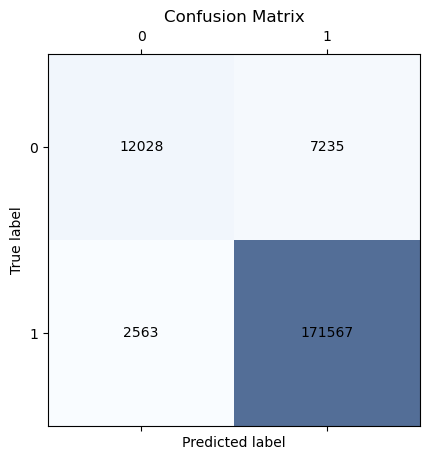

In [108]:
# plot the confusion matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

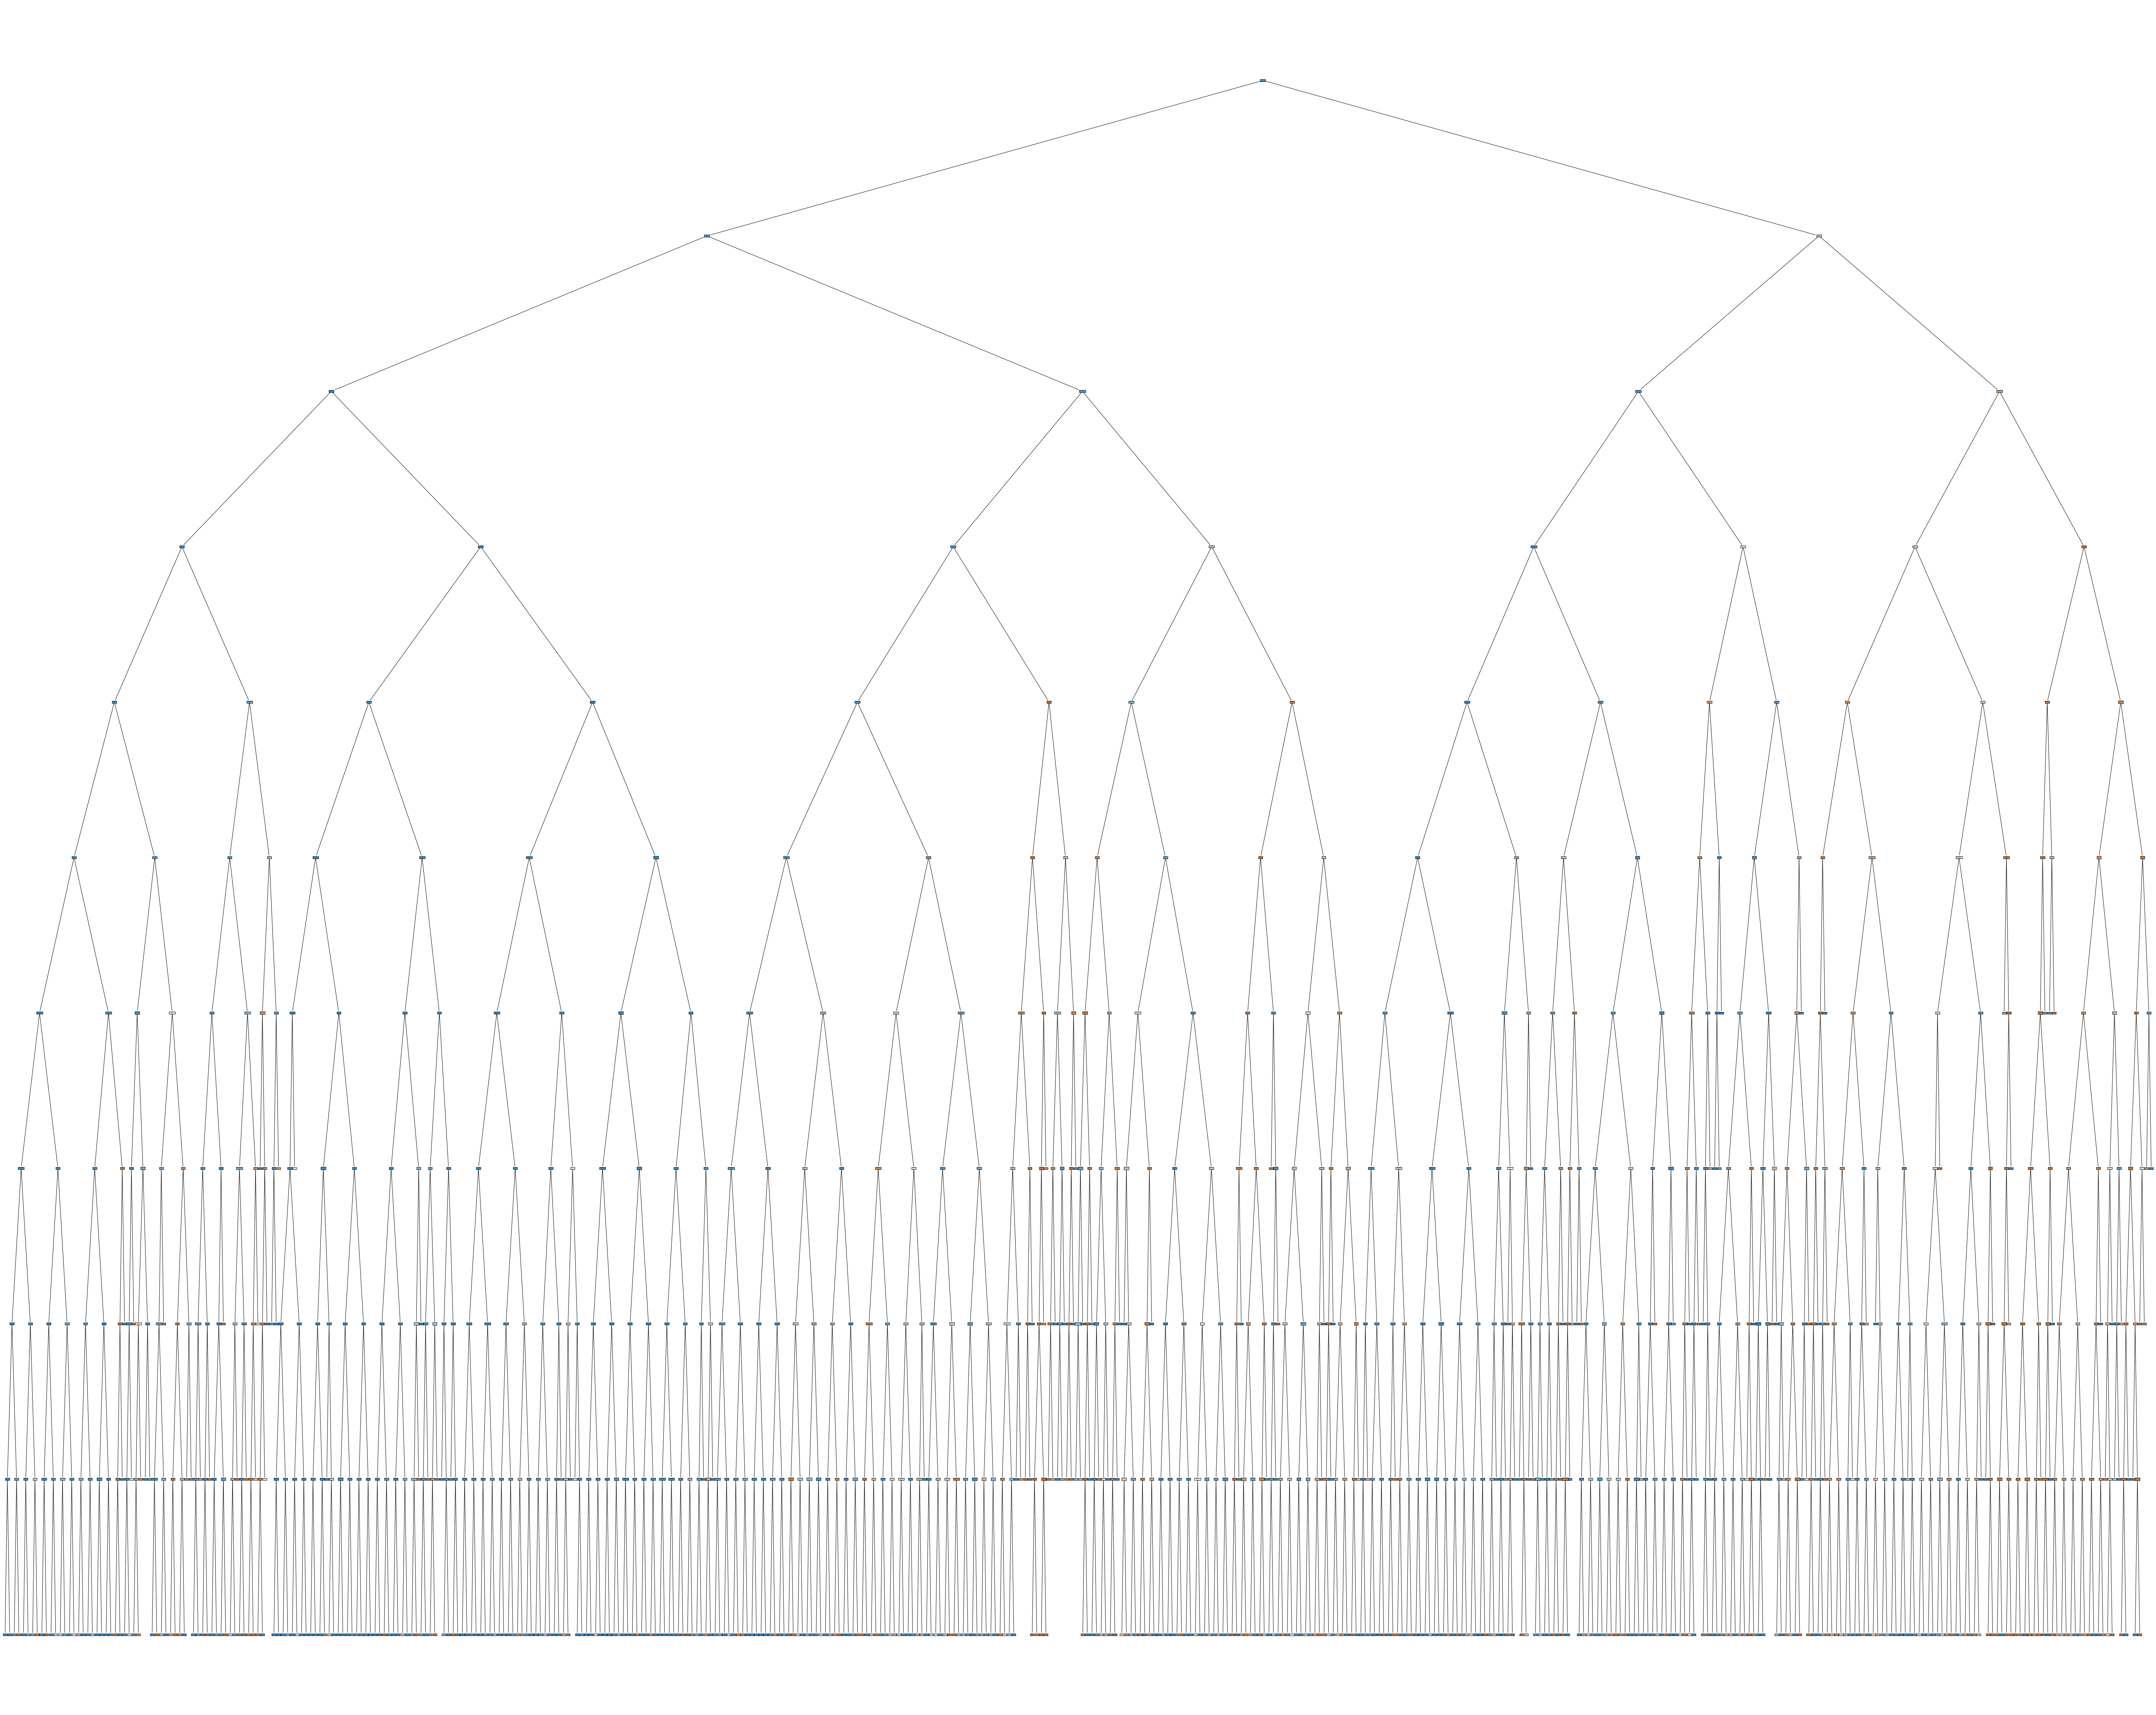

In [109]:
# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 80))
plot_tree(dt_model, filled=True, feature_names=x.columns, class_names=['adult_True', 'adult_False'])
plt.show()

# Support Vector Machine 

In [151]:
data = model_df
data.head()


vote_average  vote_count     revenue  runtime     budget  \
title                                                                     
inception             8.364       34495   825532764      148  160000000   
interstellar          8.417       32571   701729206      169  165000000   
thedarkknight         8.512       30619  1004558444      152  185000000   
avatar                7.573       29815  2923706026      162  237000000   
theavengers           7.710       29166  1518815515      143  220000000   

                original_title  popularity  action  adventure  animation  ...  \
title                                                                     ...   
inception            Inception      83.952       1          1          0  ...   
interstellar      Interstellar     140.241       0          1          0  ...   
thedarkknight  The Dark Knight     130.643       1          0          0  ...   
avatar                  Avatar      79.932       1          1          0  ...   
theavengers       The Avengers      98.082       1          1          0  ...   

               vanuatu  venezuela  vietnam  wallisandfutunaislands  \
title                                                                
inception            0          0        0                       0   
interstellar         0          0        0                       0   
thedarkknight        0          0        0                       0   
avatar               0          0        0                       0   
theavengers          0          0        0                       0   

               westernsahara  yemen  yugoslavia  zaire  zambia  zimbabwe  
title                                                                     
inception                  0      0           0      0       0         0  
interstellar               0      0           0      0       0         0  
thedarkknight              0      0           0      0       0         0  
avatar                     0      0           0      0       0         0  
theavengers                0      0           0      0       0         0  

[5 rows x 290 columns]

In [152]:
result ='animation'

In [153]:
data[result].value_counts()
#Separate majority and minority classes
class_1 = data[data[result] == 0]
class_0 = data[data[result] == 1]

#Undersample the majority class
class_1_undersampled = class_1.nlargest(len(class_0), 'revenue')

#Combine the two classes
balanced_data = pd.concat([class_1_undersampled, class_0])

#Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42)

print(balanced_data[result].value_counts())
svm_df=balanced_data

animation
1    47508
0    47508
Name: count, dtype: int64


In [154]:
X = svm_df[['vote_average', 'vote_count', 'revenue', 'runtime' ,'budget', 'popularity']]
y = svm_df[result]

In [155]:
print("Class distribution:\n", y.value_counts())

Class distribution:
 animation
1    47508
0    47508
Name: count, dtype: int64


In [156]:
X_sampled, y_sampled = X.sample(frac=0.01, random_state=42), y.sample(frac=0.01, random_state=42)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split( X_sampled, y_sampled , test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC , SVC 
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:

svm_model = SVC(kernel='rbf', C=1 , gamma=1 ,random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, gamma=1, random_state=42)

In [161]:
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\n\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))

Accuracy: 89.28%


Confusion Matrix:
 [[12393  1793]
 [ 1264 13055]]

               precision    recall  f1-score   support

           0       0.91      0.87      0.89     14186
           1       0.88      0.91      0.90     14319

    accuracy                           0.89     28505
   macro avg       0.89      0.89      0.89     28505
weighted avg       0.89      0.89      0.89     28505



# K_Means Algorithom

In [121]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import seaborn as sns

In [122]:
# select feature what it used
k_means_df = model_df[['vote_average', 'vote_count',
                        'revenue', 'runtime', 'budget', 'popularity']]

In [123]:

scaler = MinMaxScaler()

In [124]:
#apply scale 
k_means_df[['vote_average_T', 'vote_count_T', 'revenue_T'
            , 'runtime_T', 'budget_T', 'popularity_T']
            ] = scaler.fit_transform(k_means_df)

In [125]:
k_means_df.head()

vote_average  vote_count     revenue  runtime     budget  \
title                                                                     
inception             8.364       34495   825532764      148  160000000   
interstellar          8.417       32571   701729206      169  165000000   
thedarkknight         8.512       30619  1004558444      152  185000000   
avatar                7.573       29815  2923706026      162  237000000   
theavengers           7.710       29166  1518815515      143  220000000   

               popularity  vote_average_T  vote_count_T  revenue_T  runtime_T  \
title                                                                           
inception          83.952          0.8364      1.000000   0.275178   0.010278   
interstellar      140.241          0.8417      0.944224   0.233910   0.011736   
thedarkknight     130.643          0.8512      0.887636   0.334853   0.010556   
avatar             79.932          0.7573      0.864328   0.974569   0.011250   
theavengers        98.082          0.7710      0.845514   0.506272   0.009931   

               budget_T  popularity_T  
title                                  
inception         0.160      0.028037  
interstellar      0.165      0.046835  
thedarkknight     0.185      0.043630  
avatar            0.237      0.026694  
theavengers       0.220      0.032756

In [126]:
def elbow_matrix(data , max_k):    
    sse = []

    for k in range(1,max_k):
        km = KMeans(n_clusters=k)
        km.fit(data)
        sse.append(km.inertia_)

    plt.xlabel('K')
    plt.ylabel('Sum of squared error')
    plt.plot(range(1,max_k),sse)    

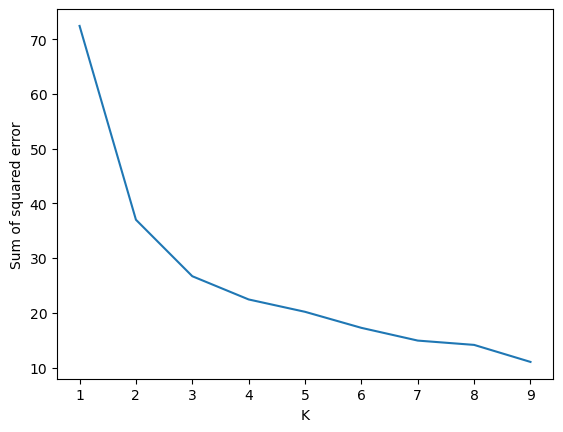

In [127]:
elbow_matrix(k_means_df[[  'revenue_T'
            ,  'budget_T', 'popularity_T']],10)

In [128]:
from mpl_toolkits.mplot3d import Axes3D

In [129]:
# apply k_means algorthim
km = KMeans(n_clusters=2)
km.fit(k_means_df[[ 'revenue_T'
            , 'budget_T', 'popularity_T']])
k_means_df['clustering_1'] = km.labels_


In [130]:
k_means_df

vote_average  vote_count     revenue  runtime     budget  \
title                                                                        
inception                8.364       34495   825532764      148  160000000   
interstellar             8.417       32571   701729206      169  165000000   
thedarkknight            8.512       30619  1004558444      152  185000000   
avatar                   7.573       29815  2923706026      162  237000000   
theavengers              7.710       29166  1518815515      143  220000000   
...                        ...         ...         ...      ...        ...   
lepèredemacopine         0.000           0           0        0          0   
dádiva                   0.000           0           0        6          0   
gatilho                  0.000           0           0        3          0   
placa-mãe                0.000           0           0        6          0   
lescaptives              0.000           0           0       85          0   

                  popularity  vote_average_T  vote_count_T     revenue_T  \
title                                                                      
inception             83.952          0.8364      1.000000  2.751776e-01   
interstellar         140.241          0.8417      0.944224  2.339097e-01   
thedarkknight        130.643          0.8512      0.887636  3.348528e-01   
avatar                79.932          0.7573      0.864328  9.745687e-01   
theavengers           98.082          0.7710      0.845514  5.062718e-01   
...                      ...             ...           ...           ...   
lepèredemacopine       0.844          0.0000      0.000000  4.000000e-09   
dádiva                 0.600          0.0000      0.000000  4.000000e-09   
gatilho                0.600          0.0000      0.000000  4.000000e-09   
placa-mãe              0.600          0.0000      0.000000  4.000000e-09   
lescaptives            0.000          0.0000      0.000000  4.000000e-09   

                  runtime_T  budget_T  popularity_T  clustering_1  
title                                                              
inception          0.010278     0.160      0.028037             1  
interstellar       0.011736     0.165      0.046835             1  
thedarkknight      0.010556     0.185      0.043630             1  
avatar             0.011250     0.237      0.026694             1  
theavengers        0.009931     0.220      0.032756             1  
...                     ...       ...           ...           ...  
lepèredemacopine   0.000000     0.000      0.000282             0  
dádiva             0.000417     0.000      0.000200             0  
gatilho            0.000208     0.000      0.000200             0  
placa-mãe          0.000417     0.000      0.000200             0  
lescaptives        0.005903     0.000      0.000000             0  

[966965 rows x 13 columns]

In [131]:

def plot_3d_clusters(data, cluster_column, features, figsize=(12, 9), colors=None):

    if len(features) != 3:
        raise ValueError("features must be a list of three column names.")

    unique_clusters = data[cluster_column].unique()
    if colors is None:
        colors = plt.cm.tab10.colors  

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    for idx, cluster in enumerate(unique_clusters):
        clustered_data = data[data[cluster_column] == cluster]
        ax.scatter(clustered_data[features[0]], 
                   clustered_data[features[1]], 
                   clustered_data[features[2]], 
                   label=f'Cluster {cluster}', 
                   color=colors[idx % len(colors)])

    ax.set_title('3D Cluster Visualization')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    ax.legend()
    plt.show()



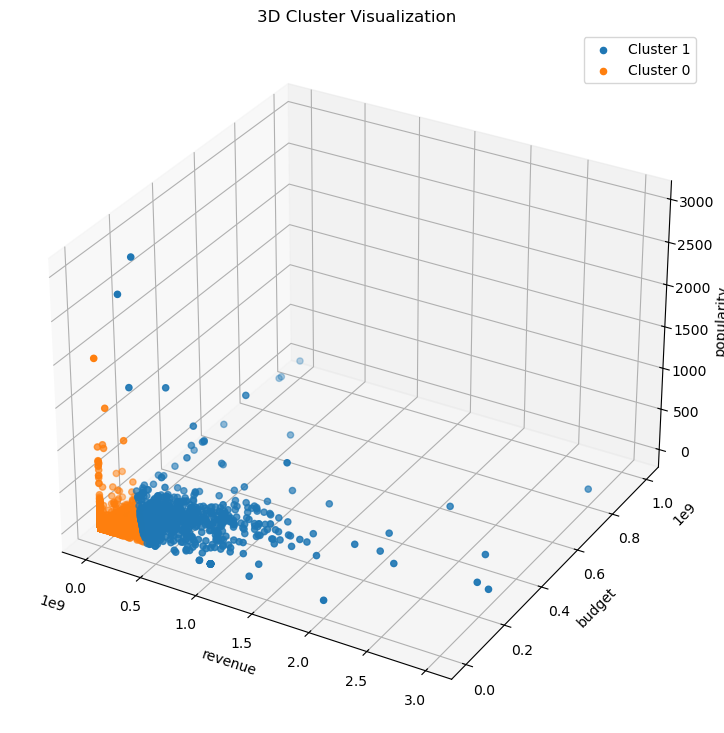

In [132]:
plot_3d_clusters(k_means_df, 'clustering_1', [ 'revenue'
            , 'budget', 'popularity'])


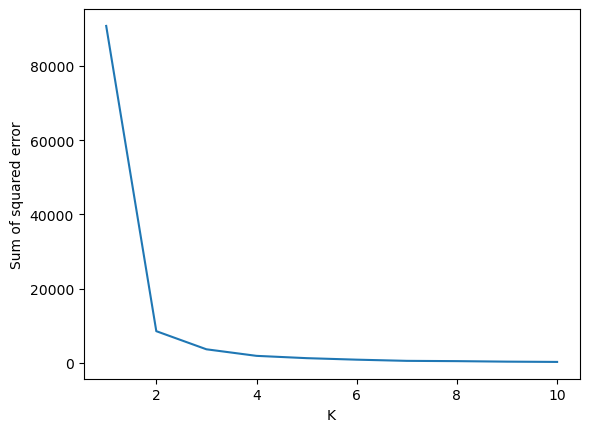

In [133]:
elbow_matrix(k_means_df[[  'vote_count_T'
            ,  'vote_average_T', 'popularity_T']],11)

In [134]:
# apply k_means algorthim
km = KMeans(n_clusters=2)
km.fit(k_means_df[[  'vote_count_T'
            ,  'vote_average_T', 'popularity_T']])
k_means_df['clustering_2'] = km.labels_

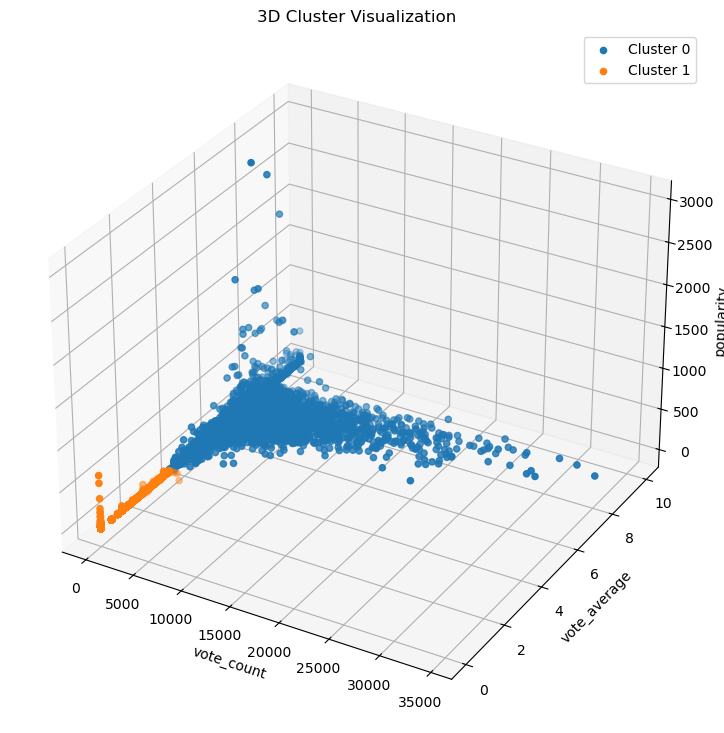

In [135]:
plot_3d_clusters(k_means_df, 'clustering_2', ['vote_count'
                ,'vote_average','popularity'])


In [136]:
k_means_df.head(20)

vote_average  vote_count  \
title                                                                
inception                                        8.364       34495   
interstellar                                     8.417       32571   
thedarkknight                                    8.512       30619   
avatar                                           7.573       29815   
theavengers                                      7.710       29166   
deadpool                                         7.606       28894   
avengers:infinitywar                             8.255       27713   
fightclub                                        8.438       27238   
guardiansofthegalaxy                             7.906       26638   
pulpfiction                                      8.488       25893   
forrestgump                                      8.477       25409   
harrypotterandthephilosopher'sstone              7.916       25379   
ironman                                          7.640       24874   
djangounchained                                  8.171       24672   
theshawshankredemption                           8.702       24649   
avengers:endgame                                 8.263       23857   
thematrix                                        8.206       23815   
titanic                                          7.900       23637   
joker                                            8.168       23425   
thelordoftherings:thefellowshipofthering         8.402       23323   

                                             revenue  runtime     budget  \
title                                                                      
inception                                  825532764      148  160000000   
interstellar                               701729206      169  165000000   
thedarkknight                             1004558444      152  185000000   
avatar                                    2923706026      162  237000000   
theavengers                               1518815515      143  220000000   
deadpool                                   783100000      108   58000000   
avengers:infinitywar                      2052415039      149  300000000   
fightclub                                  100853753      139   63000000   
guardiansofthegalaxy                       772776600      121  170000000   
pulpfiction                                213900000      154    8500000   
forrestgump                                677387716      142   55000000   
harrypotterandthephilosopher'sstone        976475550      152  125000000   
ironman                                    585174222      126  140000000   
djangounchained                            425368238      165  100000000   
theshawshankredemption                      28341469      142   25000000   
avengers:endgame                          2800000000      181  356000000   
thematrix                                  463517383      136   63000000   
titanic                                   2264162353      194  200000000   
joker                                     1074458282      122   55000000   
thelordoftherings:thefellowshipofthering   871368364      179   93000000   

                                          popularity  vote_average_T  \
title                                                                  
inception                                     83.952          0.8364   
interstellar                                 140.241          0.8417   
thedarkknight                                130.643          0.8512   
avatar                                        79.932          0.7573   
theavengers                                   98.082          0.7710   
deadpool                                      72.735          0.7606   
avengers:infinitywar                         154.340          0.8255   
fightclub                                     69.498          0.8438   
guardiansofthegalaxy                          33.255          0.7906   
pulpfiction                         

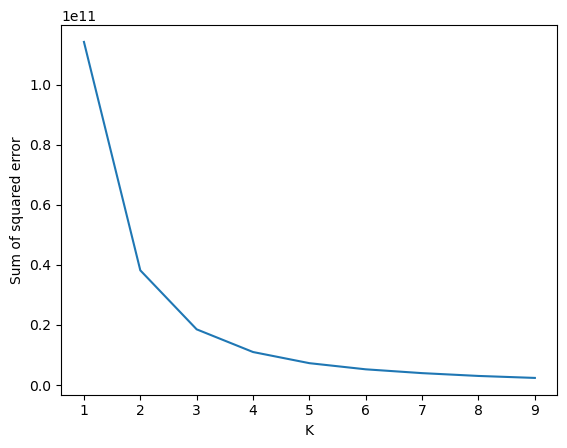

In [137]:
elbow_matrix(k_means_df[[  'revenue_T'
        , 'vote_count' ,'vote_average', 'budget_T', 'popularity_T']],10)

In [138]:
# apply k_means algorthim
km = KMeans(n_clusters=2)
km.fit(k_means_df[[  'revenue_T'
        , 'vote_count' ,'vote_average', 'budget_T', 'popularity_T']])
k_means_df['cluster'] = km.labels_

In [139]:
#add original title 
k_means_df = pd.concat([k_means_df, model_df['original_title']], axis=1)

# MongoDB

In [162]:
import pymongo

In [ ]:
from pymongo import MongoClient

client = MongoClient()  
db = client["k_means_db"]  
collection_1 = db["cluster 1"]  
collection_0 = db["cluster 0"]  

data_dict_1 = k_means_df[k_means_df['cluster'] == 1].to_dict("records")
data_dict_0 = k_means_df[k_means_df['cluster'] == 0].to_dict("records")

collection_1.insert_many(data_dict_1)
collection_0.insert_many(data_dict_0)

In [ ]:
result = collection_1.find({
    "runtime": {"$gt": 140},
    "budget": {"$lt": 200000000}
})
for doc in range(2):
    print(result[doc])


In [ ]:
result = collection_1.find({
    "vote_count": 34495,
    "cluster": 1
})
for doc in result:
    print(doc)


In [ ]:
result = collection_1.find({"vote_average": {"$gt": 8.5}})
for doc in range(2):
    print(result[doc])


# visualization

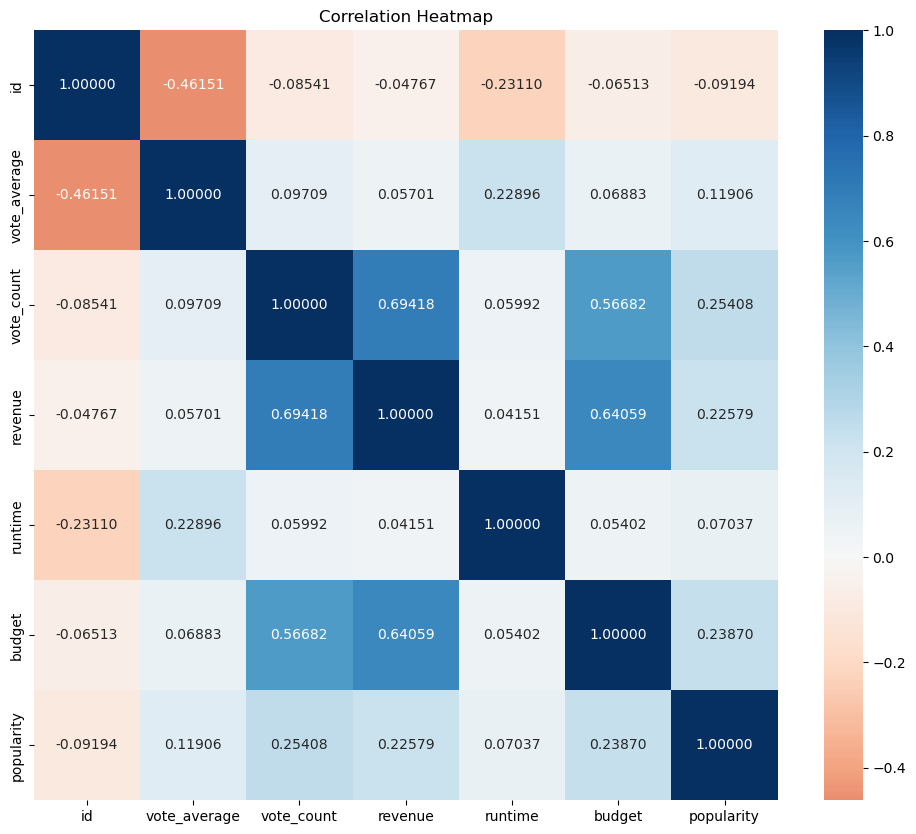

In [44]:
numeric_data = df.select_dtypes(include='number')

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".5f", center=0)
plt.title('Correlation Heatmap')
plt.show()

In [45]:
def plot_box(feature):
    df.boxplot(feature, vert=False,showfliers=False)

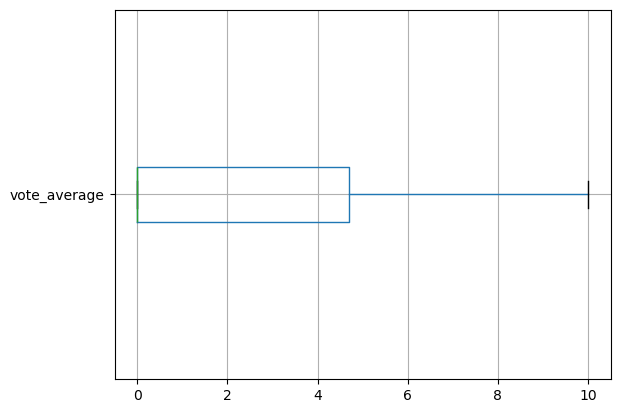

In [46]:
# Visualizing the distribution of Ratings.
plot_box('vote_average')

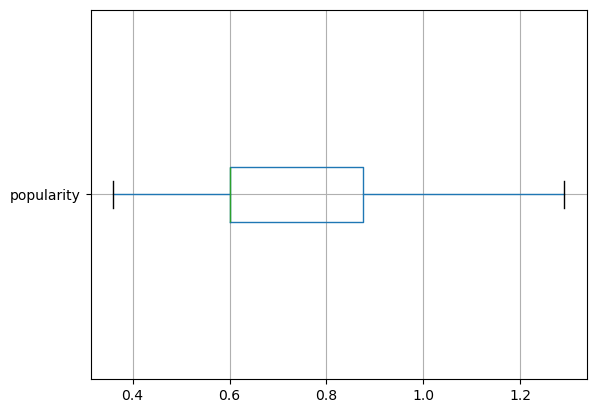

In [47]:
#visualizint the distribution of Popularity
plot_box('popularity')

Text(0, 0.5, 'Revenue')

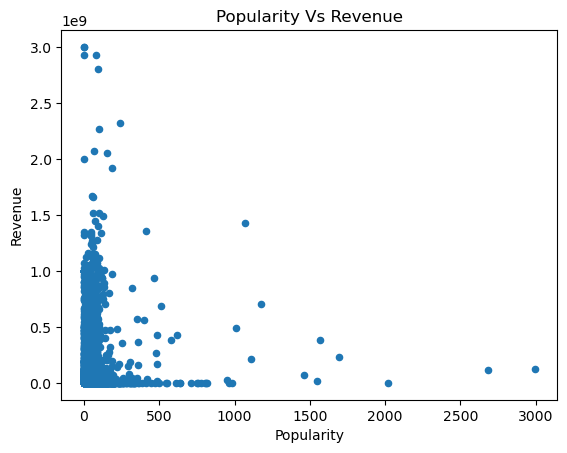

In [48]:
# Scatter plot of Revenue vs Popularity
df.plot(x='popularity',y='revenue',kind='scatter')
plt.title('Popularity Vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

Text(0, 0.5, 'Popularity')

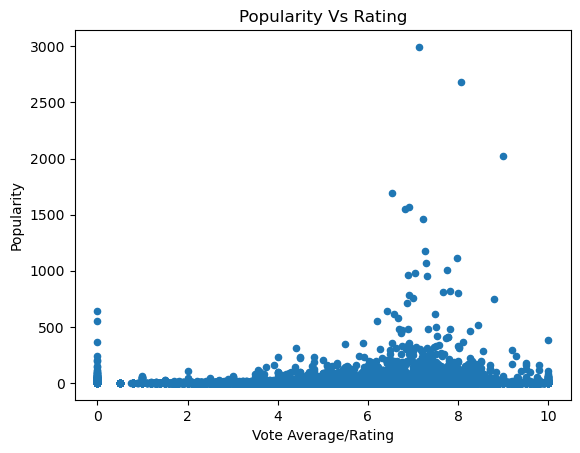

In [49]:
# Scatter plot of Popularity vs Ratings
df.plot(x='vote_average',y='popularity',kind='scatter')
plt.title('Popularity Vs Rating')
plt.xlabel('Vote Average/Rating')
plt.ylabel('Popularity')

Text(0, 0.5, 'Revenue')

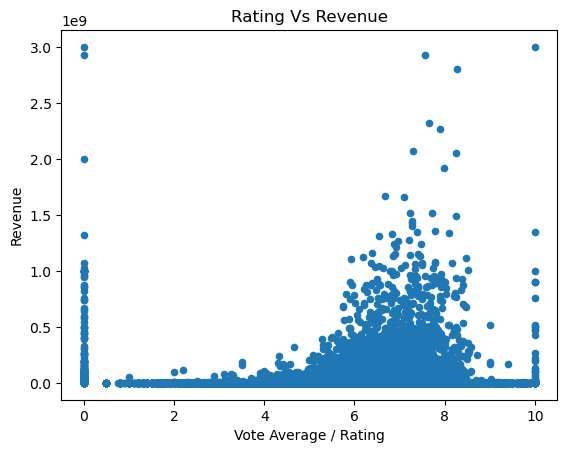

In [50]:
# Scatter plot of Revenue vs Ratings
df.plot(x='vote_average',y='revenue',kind='scatter')
plt.title('Rating Vs Revenue')
plt.xlabel('Vote Average / Rating')
plt.ylabel('Revenue')

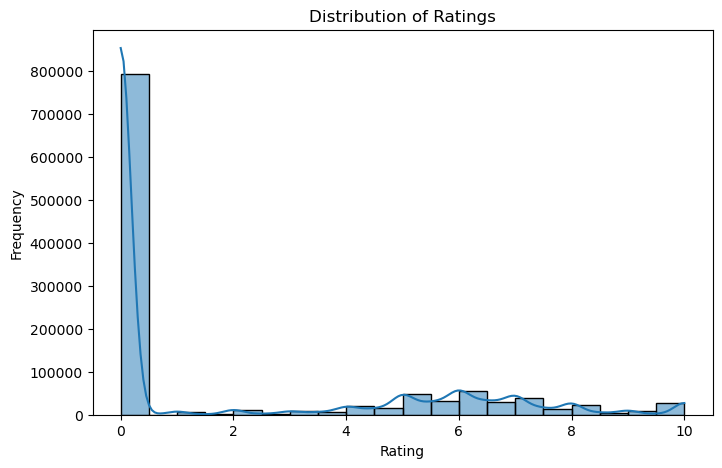

In [51]:
# Distribution of 'Rating'
summary_stats =df.describe()
plt.figure(figsize=(8, 5))
sns.histplot(df['vote_average'], kde=True, bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

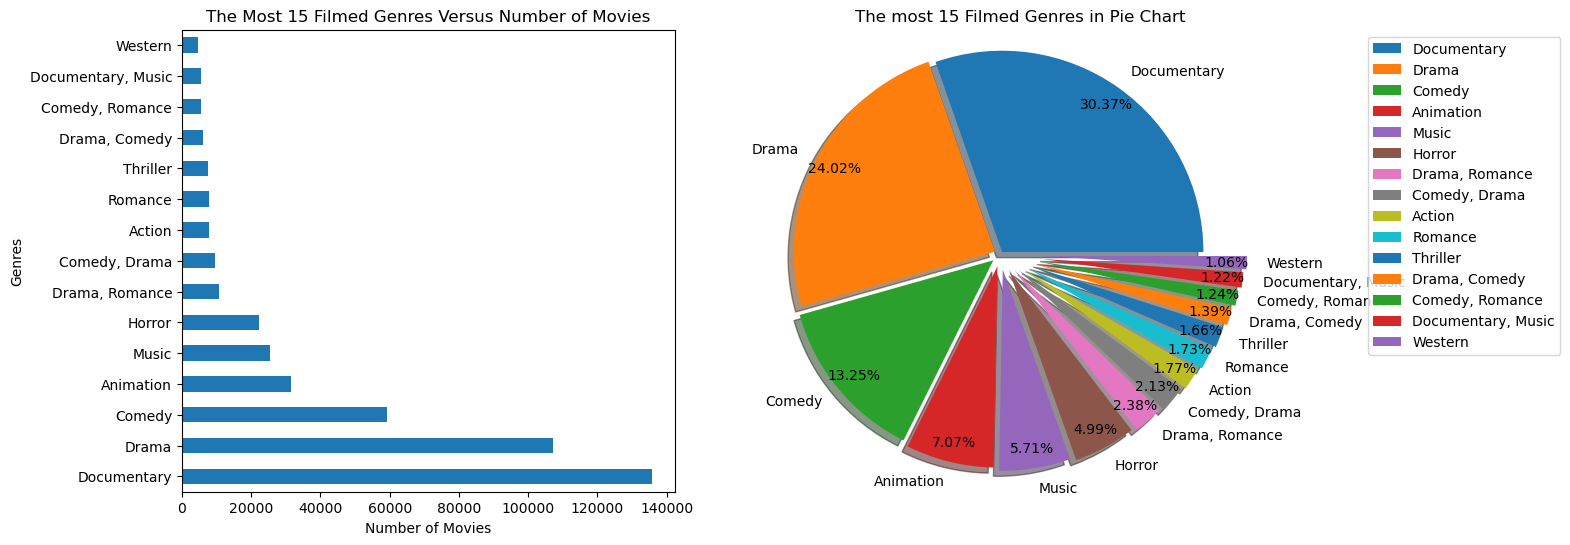

In [52]:
from matplotlib import gridspec

# # this function take column of dataframe as argument and extract wanted data from it
def data_split(col_name, size=15):
    #take a given column, and separate the string by '|'
    data = df[col_name].str.cat(sep='|')
    #storing the values separately in the series
    data = pd.Series(data.split('|'))
    #Let's count the most frequenties values for given column
    count = data.value_counts(ascending=False)
    count_size = count.head(size)
    #Setting axis name for multiple names
    if (col_name == 'production_companies'):
        sp = col_name.split('_')
        axis_name = sp[0].capitalize()+' '+ sp[1].capitalize()
    else:
        axis_name = col_name.capitalize()
    fig = plt.figure(figsize=(14, 6))
    #set the subplot
    gs = gridspec.GridSpec(1,2, width_ratios=[2,2])
    #count of given column on the bar plot
    ax0 = plt.subplot(gs[0])
    count_size.plot.barh()
    plt.xlabel('Number of Movies')
    plt.ylabel(axis_name)
    plt.title('The Most '+str(size)+' Filmed ' +axis_name+' Versus Number of Movies')
    ax = plt.subplot(gs[1])
    #setting the explode to adjust the pei chart explode variable to any given size
    explode = []
    total = 0
    for i in range(size):
        total = total + 0.015
        explode.append(total)
    #pie chart for given size and given column
    ax = count_size.plot.pie(autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=0.9, explode=explode)
    plt.title('The most '+str(size)+' Filmed ' +axis_name+ ' in Pie Chart')
    plt.xlabel('')
    plt.ylabel('')
    plt.axis('equal')
    plt.legend(loc=9, bbox_to_anchor=(1.4, 1))
data_split('genres')

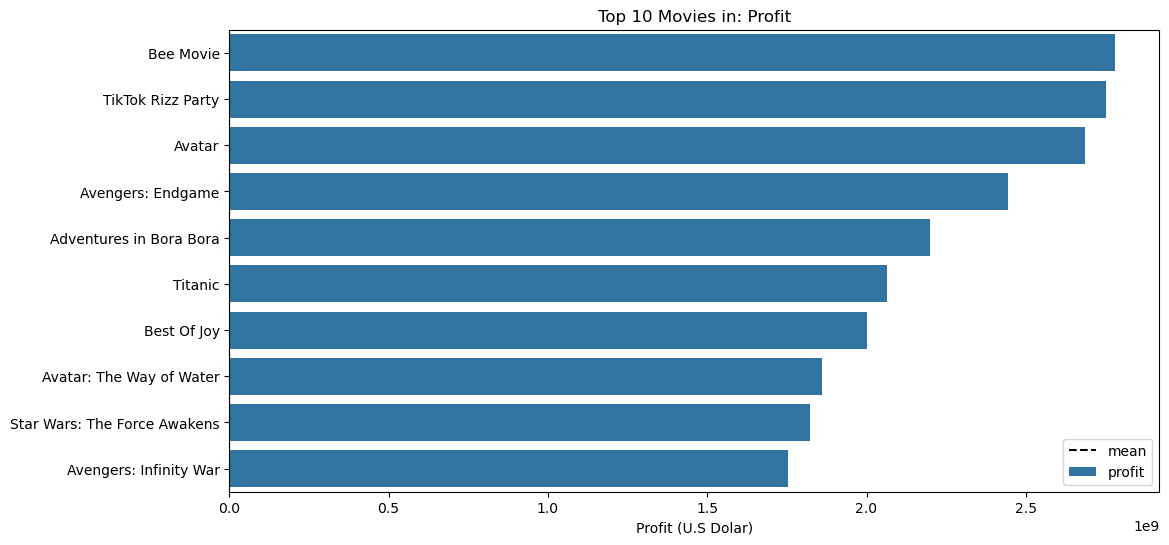

In [53]:
df['profit'] = df['revenue']-df['budget']
df['profit'] = df['profit'].apply(np.int64)
df['budget'] = df['budget'].apply(np.int64)
df['revenue'] = df['revenue'].apply(np.int64)
def tp10(coloumn_name,size=10):
    #find the top 10 of given any column
    df_sorted=pd.DataFrame(df[coloumn_name].sort_values(ascending=False))[:size]
    df_sorted['original_title'] = df['original_title']
    plt.figure(figsize=(12,6))
    #Calculate the avarage
    avg = np.mean(df[coloumn_name])
    sns.barplot(x=coloumn_name, y='original_title', data=df_sorted, label=coloumn_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (coloumn_name == 'profit' or coloumn_name == 'budget' or coloumn_name == 'revenue'):
        plt.xlabel(coloumn_name.capitalize() + ' (U.S Dolar)')
    else:
        plt.xlabel(coloumn_name.capitalize())
    plt.ylabel('')
    plt.title('Top 10 Movies in: ' + coloumn_name.capitalize())
    plt.legend()
tp10('profit')

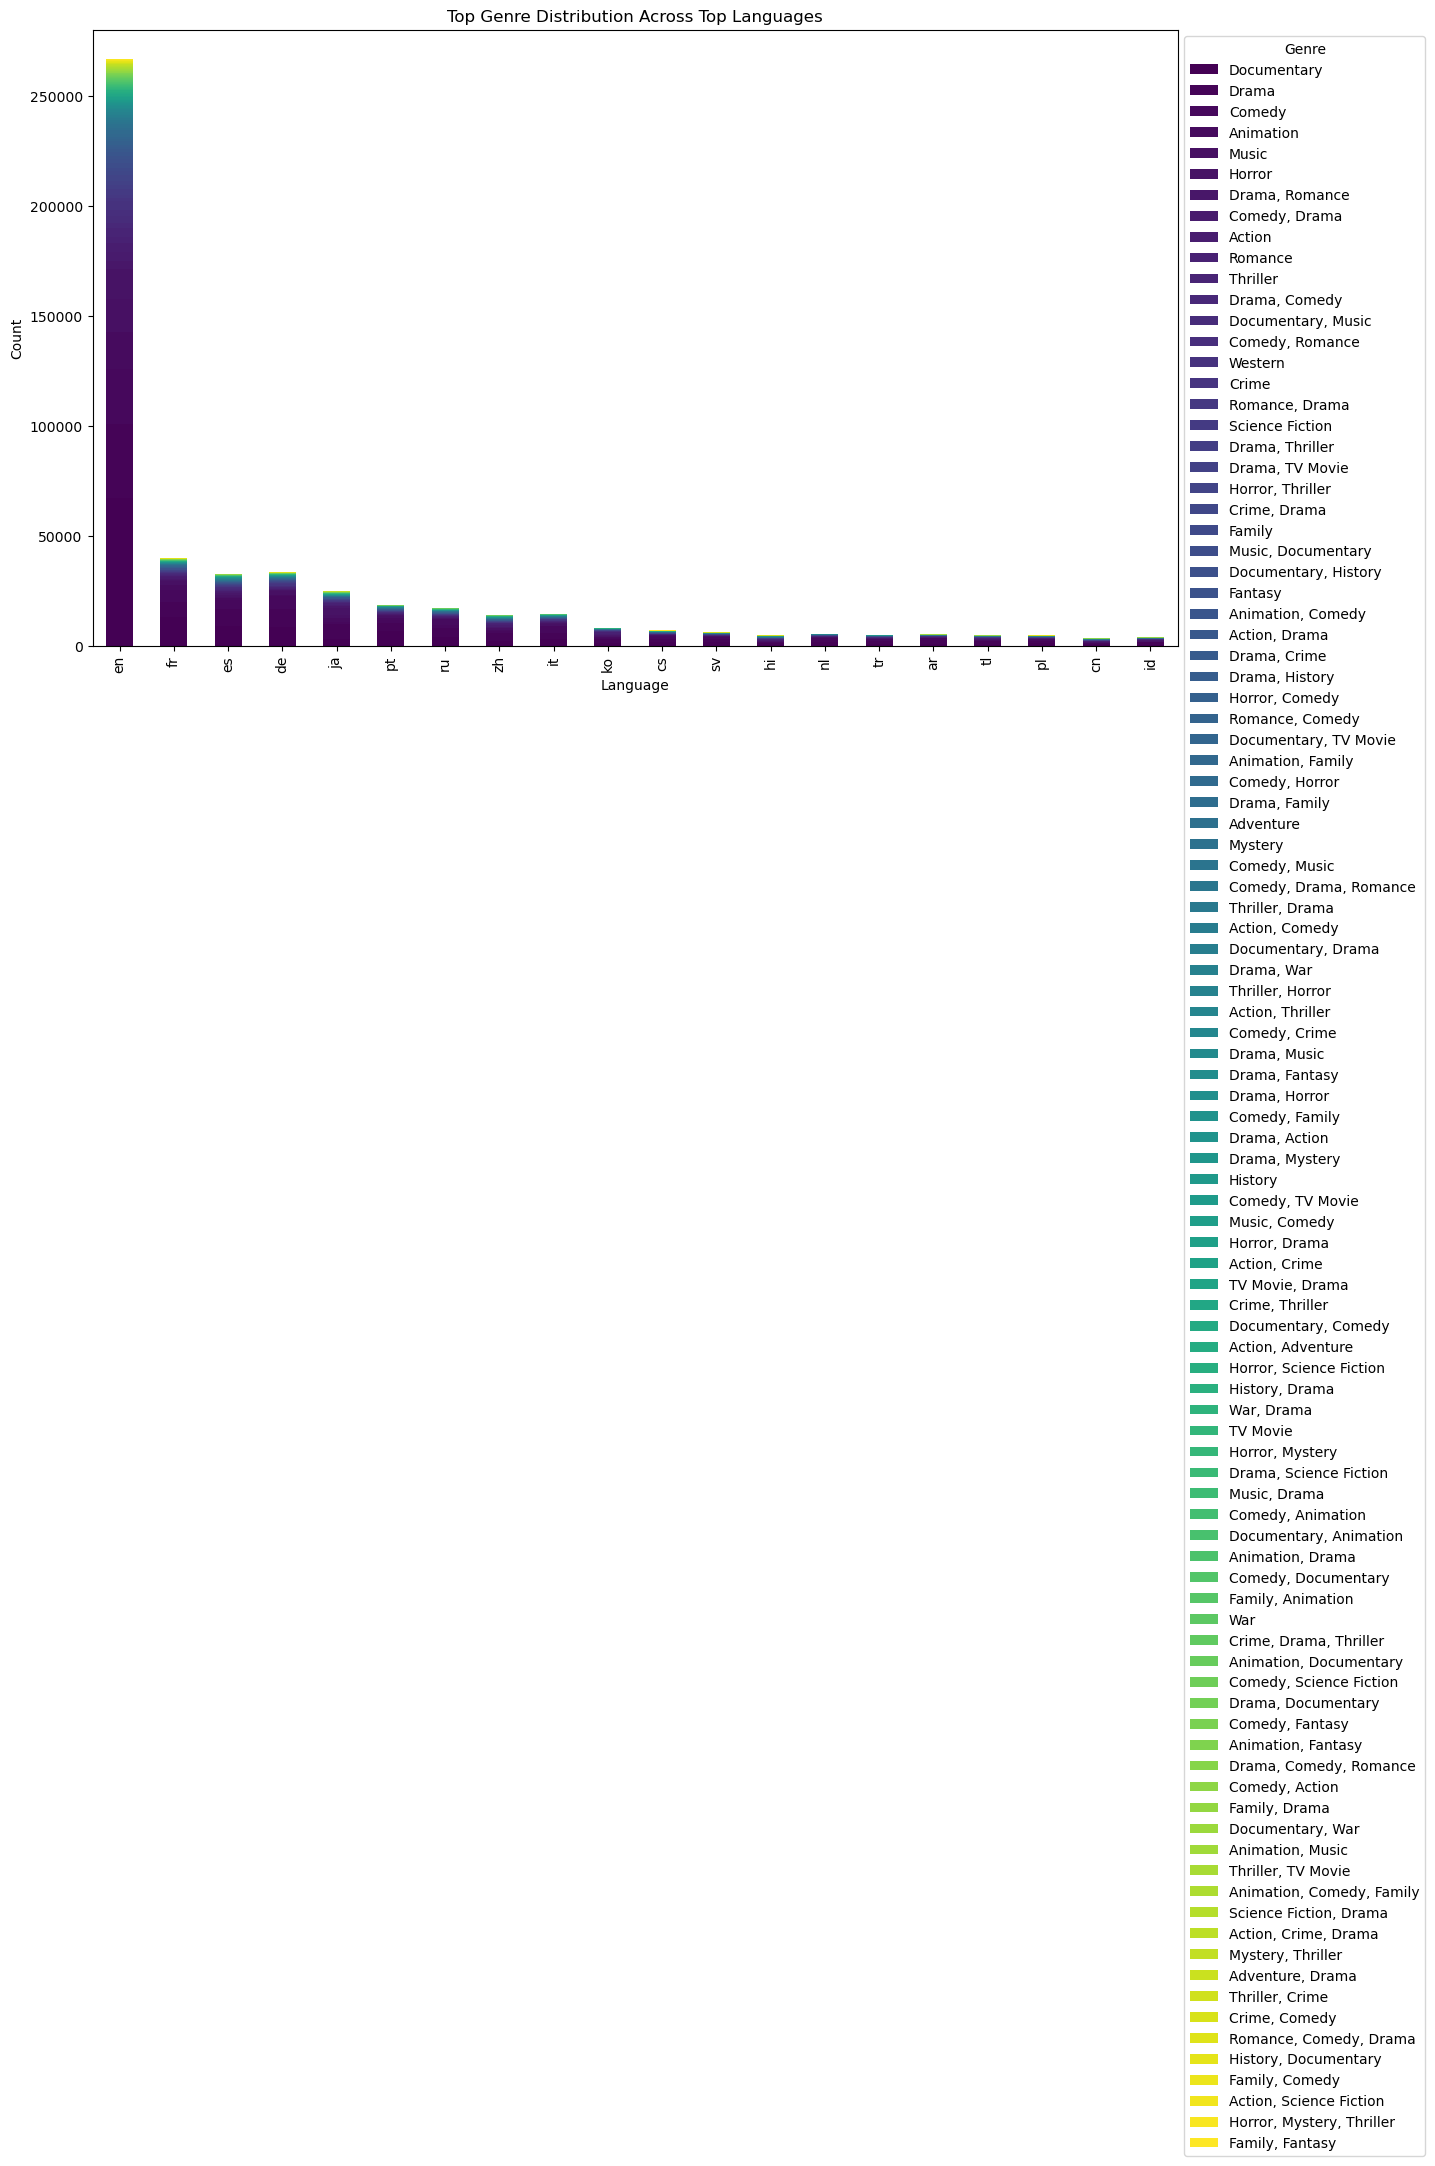

In [54]:
top_languages=20
top_genres_per_language=100
# Prepare data
genre_language_data = df[['original_language', 'genres']].dropna()
genre_language_data = genre_language_data.assign(Genre=genre_language_data['genres'].str.split(',')).explode('genres')

# Group and filter top languages
language_genre_counts = genre_language_data.groupby(['original_language', 'genres']).size().unstack(fill_value=0)
top_language_genre_counts = language_genre_counts.loc[
    language_genre_counts.sum(axis=1).nlargest(top_languages).index
]

# Reduce the number of genres to the top N
top_genres = top_language_genre_counts.sum(axis=0).nlargest(top_genres_per_language).index
filtered_language_genre_counts = top_language_genre_counts[top_genres]

# Plot stacked bar chart
filtered_language_genre_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Top Genre Distribution Across Top Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

<hr>

# Model Performance Summary
This notebook summarizes the strengths, weaknesses, and insights for various machine learning models tested on the TMDB Movies Dataset.


## 1. Random Forest

- **R² Score**: **82.21%**

### Strengths:
- Strong performance in regression tasks.
- Effectively captures non-linear relationships and feature interactions.
- Resistant to overfitting due to ensemble learning.

### Weaknesses:
- Computationally expensive for large datasets.
- Interpretability is limited.

**Best Use Case**: Regression tasks where high performance is required, such as predicting movie vote avegrage.


## 2. Naive Bayes

- **Accuracy**: **95.27%**

### Performance:
| Metric            | Class 0 | Class 1 |
|-------------------|---------|---------|
| Precision         | 0.84    | 0.96    |
| Recall            | 0.60    | 0.99    |
| F1-Score          | 0.70    | 0.97    |

### Strengths:
- Excellent performance on large and imbalanced datasets.
- Fast and computationally efficient.

### Weaknesses:
- the performance is changeable based on the feature will used in the model
- Assumes feature independence, which may not hold true.

**Best Use Case**: Classification tasks with strong class imbalance.


## 3. Logistic Regression

- **Accuracy**: **89.07%**

### Performance:
| Metric            | Class 0 | Class 1 |
|-------------------|---------|---------|
| Precision         | 0.96    | 0.84    |
| Recall            | 0.82    | 0.97    |
| F1-Score          | 0.88    | 0.90    |

### Strengths:
- Balanced performance for both classes.
- Simple and interpretable model.

### Weaknesses:
- Assumes a linear relationship between features and the target variable.

**Best Use Case**: Baseline classification tasks requiring interpretability.


## 4. K-Nearest Neighbors (KNN)

- **Accuracy**: **93.52%**

### Performance:
| Metric            | Class 0 | Class 1 |
|-------------------|---------|---------|
| Precision         | 0.95    | 0.92    |
| Recall            | 0.91    | 0.96    |
| F1-Score          | 0.93    | 0.94    |

### Strengths:
- High accuracy with balanced metrics across both classes.
- Simple to understand and implement.

### Weaknesses:
- Computationally expensive for large datasets.
- Sensitive to noisy or irrelevant features.

**Best Use Case**: Classification tasks on small to medium-sized datasets.


## 5. Decision Tree

- **Accuracy**: **94.93%**

### Performance:
| Metric            | Class 0 | Class 1 |
|-------------------|---------|---------|
| Precision         | 0.82    | 0.96    |
| Recall            | 0.62    | 0.99    |
| F1-Score          | 0.71    | 0.97    |

### Strengths:
- High recall for the dominant class (Class 1).
- Easy to interpret and visualize.

### Weaknesses:
- Poor recall for the minority class (Class 0: 62%).
- Prone to overfitting without proper pruning.

**Best Use Case**: Tasks where model interpretability is required, but class imbalance may be a challenge.


## 6. Support Vector Machine (SVM)

- **Accuracy**: **89.28%**

### Performance:
| Metric            | Class 0 | Class 1 |
|-------------------|---------|---------|
| Precision         | 0.91    | 0.88    |
| Recall            | 0.87    | 0.91    |
| F1-Score          | 0.89    | 0.90    |

### Strengths:
- Balanced precision and recall across both classes.
- Works well for high-dimensional data.

### Weaknesses:
- Computationally intensive for large datasets.
- Requires careful parameter tuning.

**Best Use Case**: Tasks involving high-dimensional feature spaces.


## Performance Comparison Table

| Model                | Metric/Score       | Notes                          |
|----------------------|--------------------|--------------------------------|
| **Random Forest**    | $R^2 = 82.21\\%$   | Best for regression tasks.     |
| **Naive Bayes**      | Accuracy = 95.27%  | Best for imbalanced datasets.  |
| **Logistic Regression** | Accuracy = 89.07% | Balanced performance.          |
| **KNN**              | Accuracy = 93.52%  | Strong accuracy, expensive.    |
| **Decision Tree**    | Accuracy = 94.93%  | Struggles with class imbalance.|
| **SVM**              | Accuracy = 89.28%  | Balanced F1-scores, slower.    |


## Insights & Recommendations

### For Classification Tasks:
- **Naive Bayes**: Best for imbalanced datasets where efficiency is critical.
- **KNN**: Strong performance but not scalable for large datasets.
- **Logistic Regression**: A good baseline with balanced results.

### For Regression Tasks:
- **Random Forest**: Strong $R^2$ score; ideal for predicting continuous outcomes like vote average.

### Next Steps:
- Perform hyperparameter tuning on top-performing models (Random Forest, Naive Bayes, KNN).
- Address class imbalance using resampling techniques like **SMOTE**.
- Perform feature engineering to improve accuracy and reduce computational cost.


<hr>